In [1]:
#!pip install xgboost --timeout 100

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
OLA = pd.read_csv("ola_driver_scaler.csv")

In [4]:
OLA.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
len(OLA)

19104

In [6]:
len(OLA.columns)

14

In [7]:
OLA.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [8]:
OLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [9]:
OLA.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [10]:
OLA["LastWorkingDate"].nunique()

493

In [11]:
OLA["Driver_ID"].nunique()

2381

In [12]:
for i in OLA.columns:
    print(f"{i}: {OLA[i].nunique()}")
    

Unnamed: 0: 19104
MMM-YY: 24
Driver_ID: 2381
Age: 36
Gender: 2
City: 29
Education_Level: 3
Income: 2383
Dateofjoining: 869
LastWorkingDate: 493
Joining Designation: 5
Grade: 5
Total Business Value: 10181
Quarterly Rating: 4


In [13]:
OLA["Unnamed: 0"].unique()

array([    0,     1,     2, ..., 19101, 19102, 19103], dtype=int64)

Text(0.5, 1.0, 'Gender Distribution in OLA Dataset')

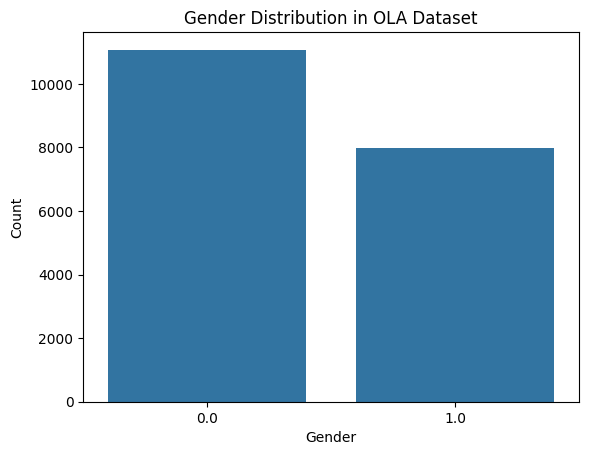

In [14]:
sns.countplot(data = OLA, x ="Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution in OLA Dataset")

Text(0.5, 1.0, 'city Distribution in OLA Dataset')

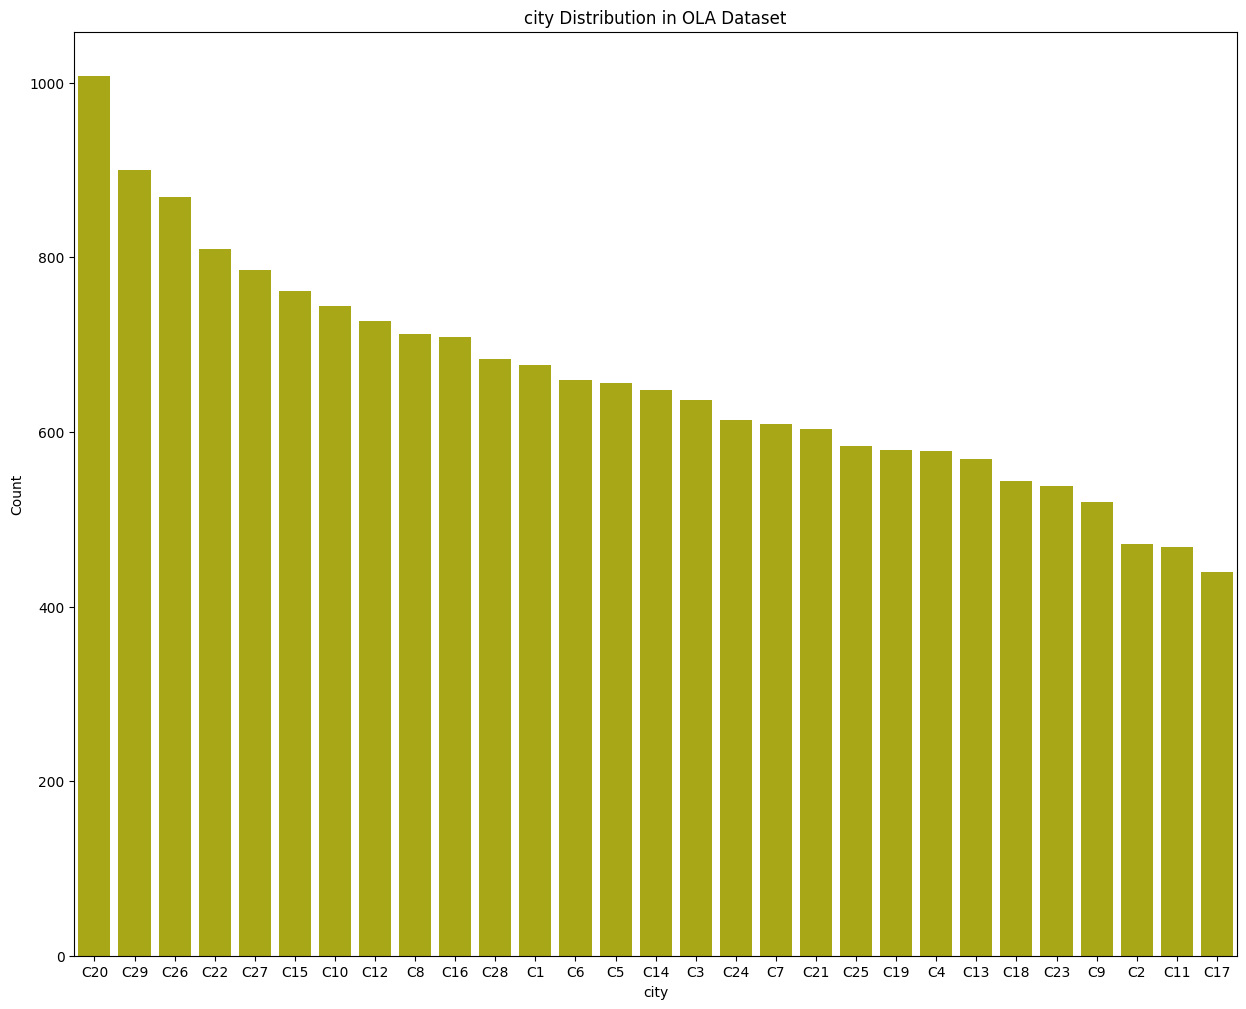

In [15]:
plt.figure(figsize = (15,12))
sorted_city = OLA['City'].value_counts().index
sns.countplot(data = OLA, x ="City",color = "y", order =sorted_city)
plt.xlabel("city")
plt.ylabel("Count")
plt.title("city Distribution in OLA Dataset")

Text(0.5, 1.0, 'Joining Designation in OLA Dataset')

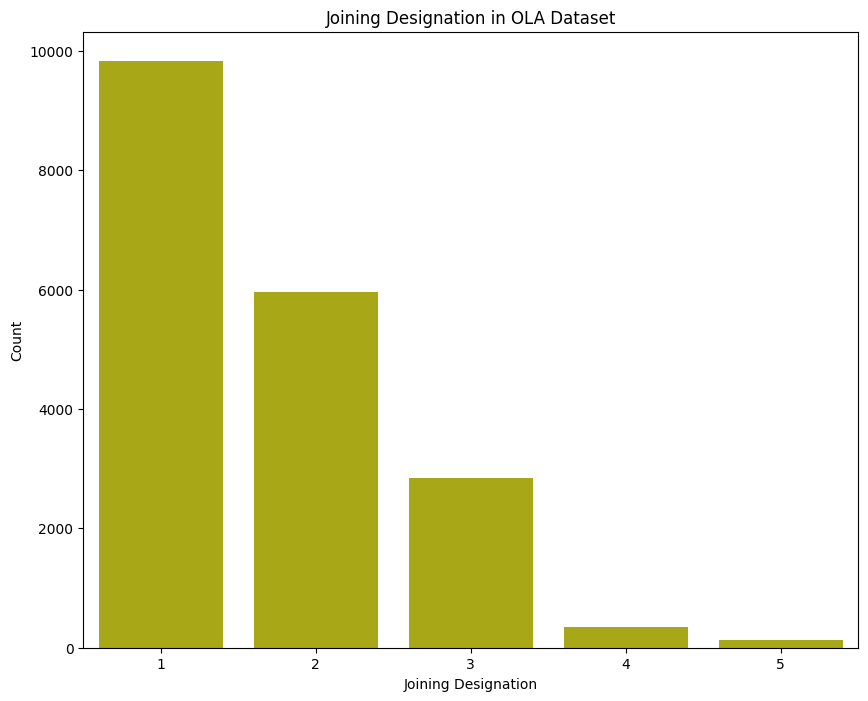

In [16]:
plt.figure(figsize = (10,8))
sorted_Joining_Designation = OLA['Joining Designation'].value_counts().index
sns.countplot(data = OLA, x ="Joining Designation",color = "y", order =sorted_Joining_Designation)
plt.xlabel("Joining Designation")
plt.ylabel("Count")
plt.title("Joining Designation in OLA Dataset")

Text(0.5, 1.0, 'Grade in OLA Dataset')

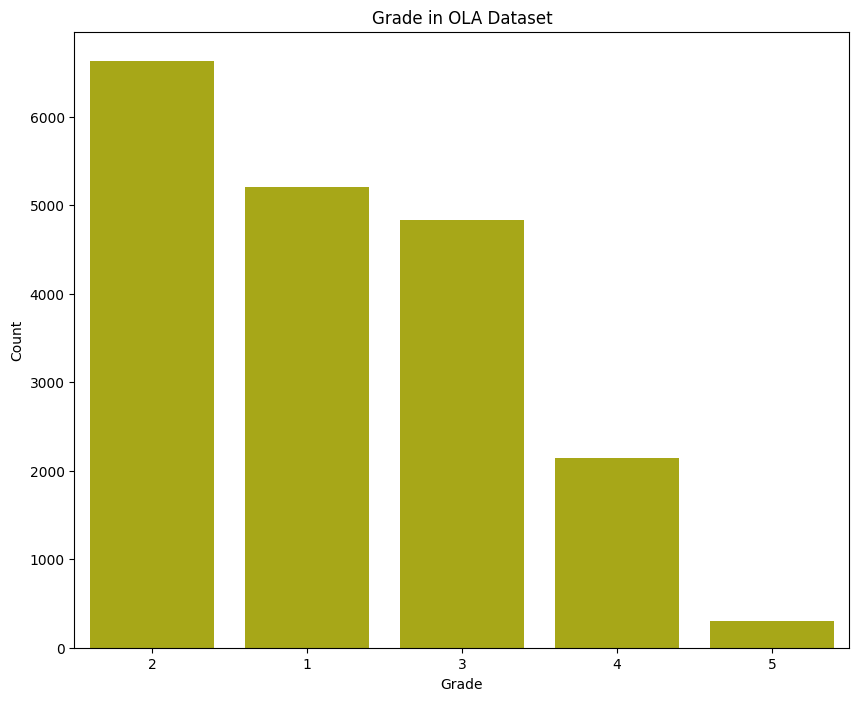

In [17]:
plt.figure(figsize = (10,8))
sorted_Grade = OLA['Grade'].value_counts().index
sns.countplot(data = OLA, x ="Grade",color = "y", order =sorted_Grade)
plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Grade in OLA Dataset")

Text(0.5, 1.0, 'Quarterly Rating in OLA Dataset')

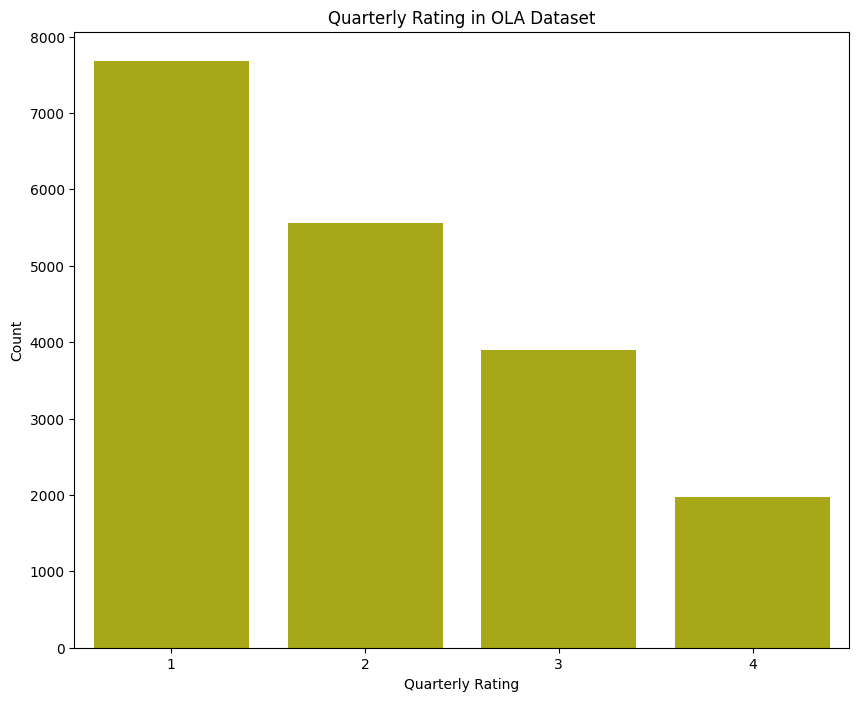

In [18]:
plt.figure(figsize = (10,8))
sorted_Quarterly_Rating = OLA['Quarterly Rating'].value_counts().index
sns.countplot(data = OLA, x ="Quarterly Rating",color = "y", order =sorted_Quarterly_Rating)
plt.xlabel("Quarterly Rating")
plt.ylabel("Count")
plt.title("Quarterly Rating in OLA Dataset")

Text(0.5, 1.0, 'Education_Level in OLA Dataset')

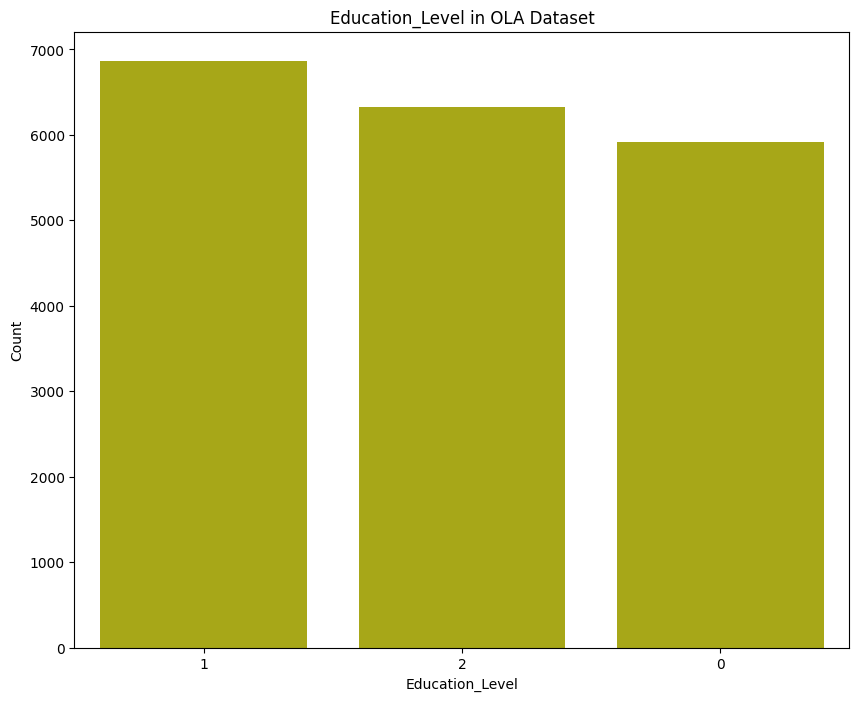

In [19]:
plt.figure(figsize = (10,8))
sorted_Education_Level = OLA['Education_Level'].value_counts().index
sns.countplot(data = OLA, x ="Education_Level",color = "y", order =sorted_Education_Level)
plt.xlabel("Education_Level")
plt.ylabel("Count")
plt.title("Education_Level in OLA Dataset")

Text(0.5, 1.0, 'MMM-YY in OLA Dataset')

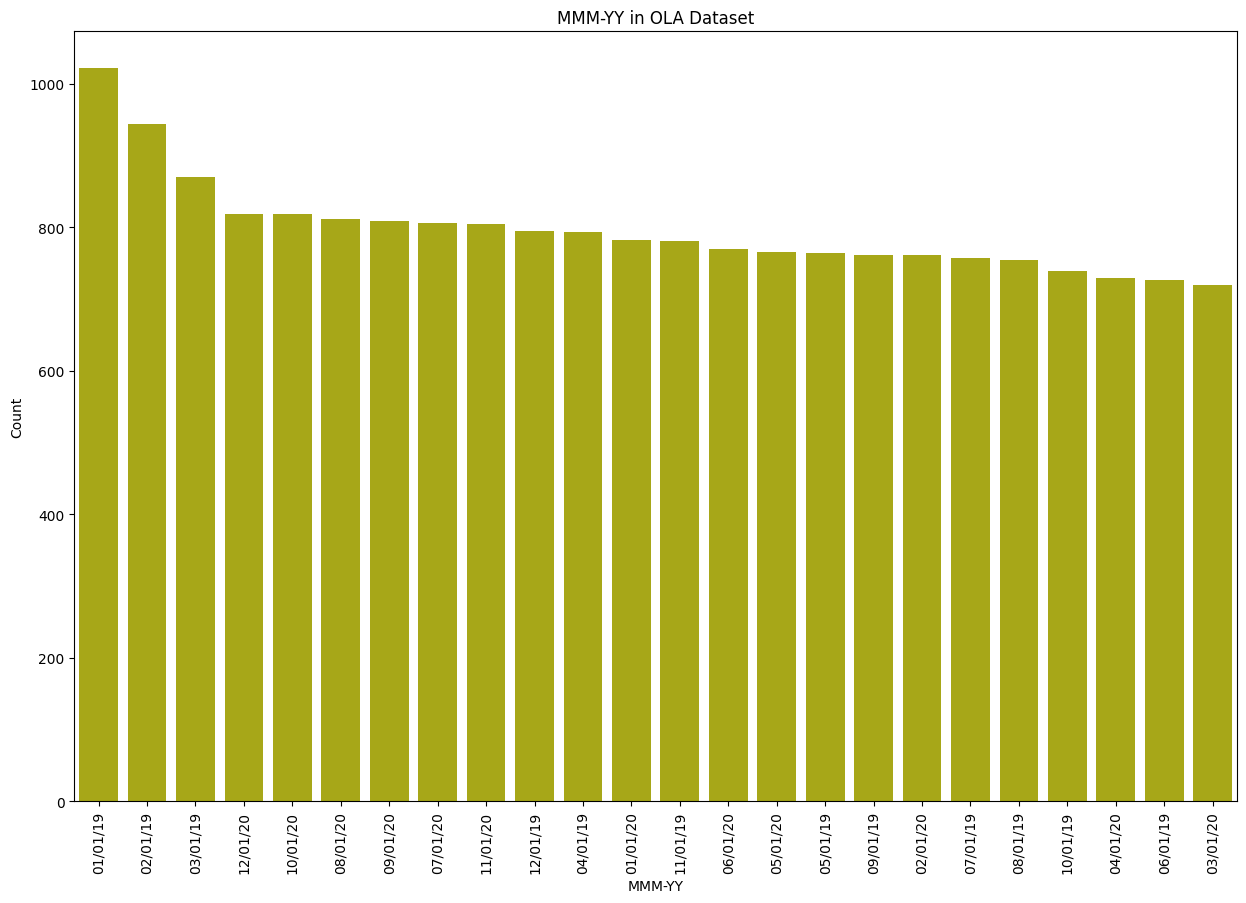

In [20]:
plt.figure(figsize = (15,10))
sorted_MMM_YY = OLA['MMM-YY'].value_counts().index
sns.countplot(data = OLA, x ="MMM-YY",color = "y", order =sorted_MMM_YY)
plt.xlabel("MMM-YY")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.title("MMM-YY in OLA Dataset")

Text(0.5, 1.0, 'AGE in OLA Dataset')

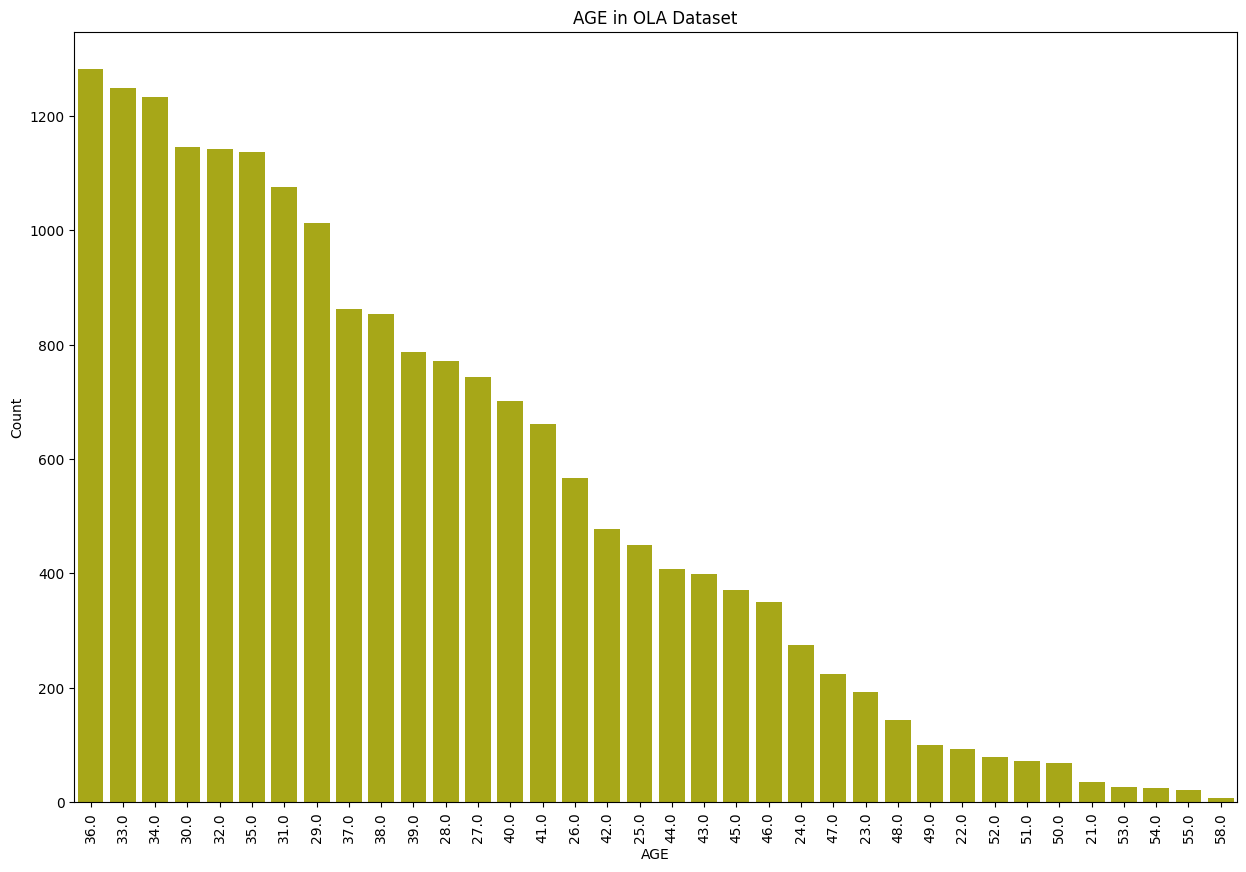

In [21]:
plt.figure(figsize = (15,10))
sorted_age = OLA['Age'].value_counts().index
sns.countplot(data = OLA, x ="Age",color = "y", order =sorted_age)
plt.xlabel("AGE")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.title("AGE in OLA Dataset")

feature engineering

In [22]:
OLA["Ride_Frequency_count"] = OLA.groupby(by ="Driver_ID")["Driver_ID"].transform("count")

In [23]:
OLA["Quarterly Rating_Frequency"] = OLA.groupby(by ="Driver_ID")["Quarterly Rating"].transform("count")

In [24]:
OLA["LastWorkingDate"].nunique()

493

In [25]:
OLA["NEW_LastWorkingDate"]= OLA["LastWorkingDate"].apply(lambda x: "churned" if pd.notnull(x) else "still_active")

In [26]:
OLA["LastWorkingDate"] = OLA["LastWorkingDate"].apply(lambda x: 1 if pd.notnull(x) else 0)

In [27]:
OLA.isnull().sum()

Unnamed: 0                     0
MMM-YY                         0
Driver_ID                      0
Age                           61
Gender                        52
City                           0
Education_Level                0
Income                         0
Dateofjoining                  0
LastWorkingDate                0
Joining Designation            0
Grade                          0
Total Business Value           0
Quarterly Rating               0
Ride_Frequency_count           0
Quarterly Rating_Frequency     0
NEW_LastWorkingDate            0
dtype: int64

In [28]:
OLA["LastWorkingDate"].unique()

array([0, 1], dtype=int64)

In [29]:
SUM_1 = OLA["LastWorkingDate"] == 1
SUM_1.sum()


1616

In [30]:
SUM_0 = OLA["LastWorkingDate"] == 0
SUM_0.sum()

17488

In [31]:
 OLA["NEW_LastWorkingDate"].unique()

array(['still_active', 'churned'], dtype=object)

([0, 1, 2, 3, 4],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

C:\Users\satheeskumar\apps\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


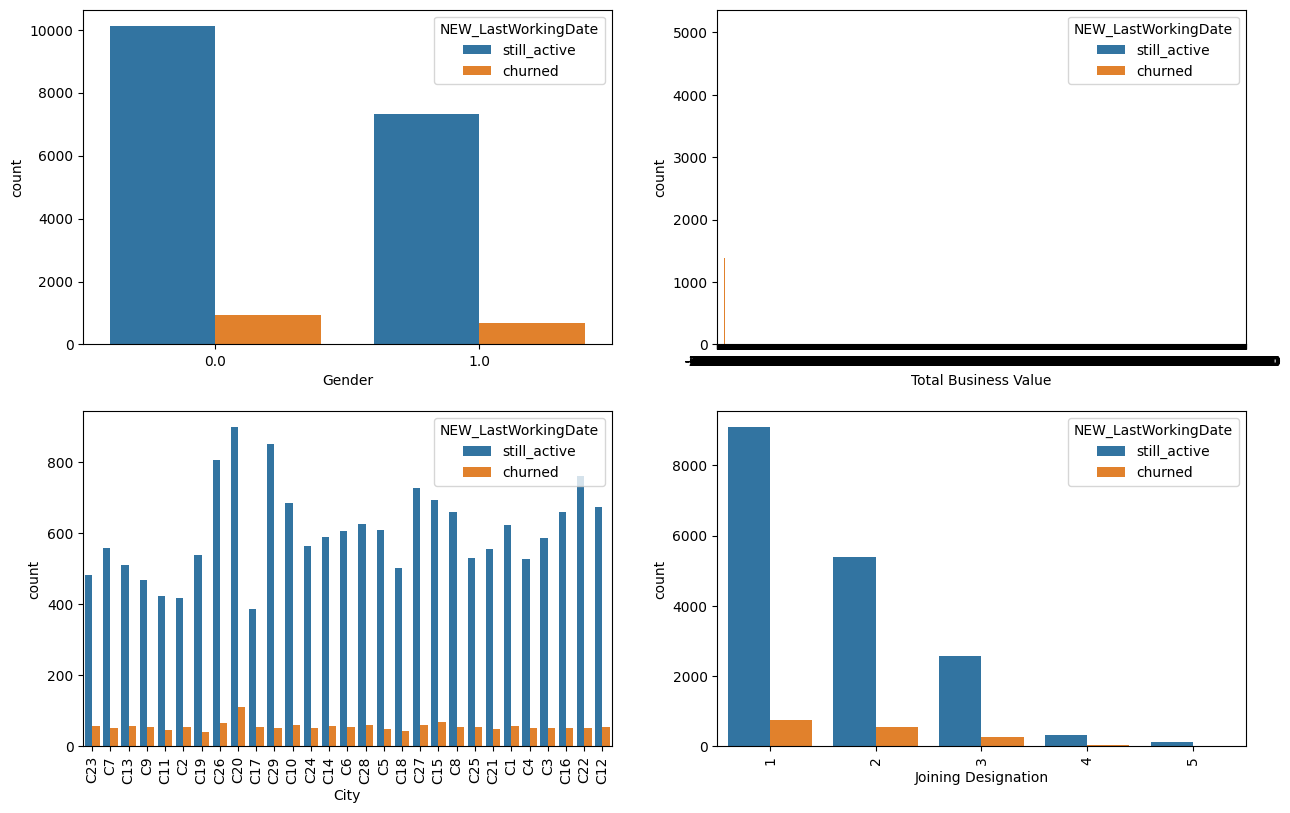

In [32]:

plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
sns.countplot(x='Gender', data=OLA, hue='NEW_LastWorkingDate')
plt.subplot(4, 2, 2)
sns.countplot(x='Total Business Value', data=OLA, hue='NEW_LastWorkingDate')
plt.subplot(4, 2, 3)
sns.countplot(x='City', data=OLA, hue='NEW_LastWorkingDate')
plt.xticks(rotation=90)
plt.subplot(4, 2, 4)
sns.countplot(x='Joining Designation', data=OLA, hue='NEW_LastWorkingDate')
#g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.xticks(rotation=90)


In [33]:
OLA.isnull().sum()

Unnamed: 0                     0
MMM-YY                         0
Driver_ID                      0
Age                           61
Gender                        52
City                           0
Education_Level                0
Income                         0
Dateofjoining                  0
LastWorkingDate                0
Joining Designation            0
Grade                          0
Total Business Value           0
Quarterly Rating               0
Ride_Frequency_count           0
Quarterly Rating_Frequency     0
NEW_LastWorkingDate            0
dtype: int64

In [34]:
for i in OLA[OLA["Age"].isnull()]["Driver_ID"].unique():
    AGE = OLA[OLA["Driver_ID"] == i]["Age"].mode()
    if not AGE.empty:
        imp = AGE.values[0]
        OLA.loc[OLA["Driver_ID"] == i, "Age"] = OLA.loc[OLA["Driver_ID"] == i, "Age"].fillna(imp) 

    

In [35]:
OLA.isnull().sum()

Unnamed: 0                     0
MMM-YY                         0
Driver_ID                      0
Age                            0
Gender                        52
City                           0
Education_Level                0
Income                         0
Dateofjoining                  0
LastWorkingDate                0
Joining Designation            0
Grade                          0
Total Business Value           0
Quarterly Rating               0
Ride_Frequency_count           0
Quarterly Rating_Frequency     0
NEW_LastWorkingDate            0
dtype: int64

In [36]:
for i in OLA[OLA["Gender"].isnull()]["Driver_ID"].unique():
    GEN = OLA[OLA["Driver_ID"] == i]["Gender"].mode()
    if not GEN.empty:
        imp = GEN.values[0]
        OLA.loc[OLA["Driver_ID"] == i,"Gender"] =OLA.loc[OLA["Driver_ID"] == i,"Gender"].fillna(imp)

In [37]:
OLA.isnull().sum()

Unnamed: 0                    0
MMM-YY                        0
Driver_ID                     0
Age                           0
Gender                        0
City                          0
Education_Level               0
Income                        0
Dateofjoining                 0
LastWorkingDate               0
Joining Designation           0
Grade                         0
Total Business Value          0
Quarterly Rating              0
Ride_Frequency_count          0
Quarterly Rating_Frequency    0
NEW_LastWorkingDate           0
dtype: int64

In [38]:
OLA.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Ride_Frequency_count,Quarterly Rating_Frequency,NEW_LastWorkingDate
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,2381060,2,3,3,still_active
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,-665480,2,3,3,still_active
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,1,0,2,3,3,churned
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1,2,2,still_active
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1,2,2,still_active


In [39]:
OLA[OLA["Driver_ID"] == 1]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Ride_Frequency_count,Quarterly Rating_Frequency,NEW_LastWorkingDate
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,2381060,2,3,3,still_active
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,-665480,2,3,3,still_active
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,1,0,2,3,3,churned


In [40]:
OLA[OLA["Driver_ID"] == 12]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Ride_Frequency_count,Quarterly Rating_Frequency,NEW_LastWorkingDate
22,22,07/01/19,12,35.0,0.0,C23,2,28116,29/06/19,0,1,1,500000,4,6,6,still_active
23,23,08/01/19,12,35.0,0.0,C23,2,28116,29/06/19,0,1,1,1707180,4,6,6,still_active
24,24,09/01/19,12,35.0,0.0,C23,2,28116,29/06/19,0,1,1,400000,4,6,6,still_active
25,25,10/01/19,12,35.0,0.0,C23,2,28116,29/06/19,0,1,1,0,1,6,6,still_active
26,26,11/01/19,12,35.0,0.0,C23,2,28116,29/06/19,0,1,1,0,1,6,6,still_active
27,27,12/01/19,12,35.0,0.0,C23,2,28116,29/06/19,1,1,1,0,1,6,6,churned


In [41]:
OLA[OLA["Driver_ID"] == 123]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Ride_Frequency_count,Quarterly Rating_Frequency,NEW_LastWorkingDate
879,879,01/01/19,123,43.0,0.0,C24,1,41401,10/07/18,0,1,1,450790,2,9,9,still_active
880,880,02/01/19,123,43.0,0.0,C24,1,41401,10/07/18,0,1,1,1243680,2,9,9,still_active
881,881,03/01/19,123,44.0,0.0,C24,1,41401,10/07/18,0,1,1,200000,2,9,9,still_active
882,882,04/01/19,123,44.0,0.0,C24,1,41401,10/07/18,0,1,1,0,2,9,9,still_active
883,883,05/01/19,123,44.0,0.0,C24,1,41401,10/07/18,0,1,1,139550,2,9,9,still_active
884,884,06/01/19,123,44.0,0.0,C24,1,41401,10/07/18,0,1,1,150140,2,9,9,still_active
885,885,07/01/19,123,44.0,0.0,C24,1,41401,10/07/18,0,1,1,0,1,9,9,still_active
886,886,08/01/19,123,44.0,0.0,C24,1,41401,10/07/18,0,1,1,0,1,9,9,still_active
887,887,09/01/19,123,44.0,0.0,C24,1,41401,10/07/18,1,1,1,0,1,9,9,churned


In [42]:
OLA[OLA["Driver_ID"] == 2000]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Ride_Frequency_count,Quarterly Rating_Frequency,NEW_LastWorkingDate
13422,13422,08/01/19,2000,24.0,0.0,C14,2,46866,24/08/19,0,1,1,0,1,11,11,still_active
13423,13423,09/01/19,2000,24.0,0.0,C14,2,46866,24/08/19,0,1,1,0,1,11,11,still_active
13424,13424,10/01/19,2000,24.0,0.0,C14,2,46866,24/08/19,0,1,1,0,2,11,11,still_active
13425,13425,11/01/19,2000,24.0,0.0,C14,2,46866,24/08/19,0,1,1,488760,2,11,11,still_active
13426,13426,12/01/19,2000,25.0,0.0,C14,2,46866,24/08/19,0,1,1,353610,2,11,11,still_active
13427,13427,01/01/20,2000,25.0,0.0,C14,2,46866,24/08/19,0,1,1,395800,1,11,11,still_active
13428,13428,02/01/20,2000,25.0,0.0,C14,2,46866,24/08/19,0,1,1,151210,1,11,11,still_active
13429,13429,03/01/20,2000,25.0,0.0,C14,2,46866,24/08/19,0,1,1,200000,1,11,11,still_active
13430,13430,04/01/20,2000,25.0,0.0,C14,2,46866,24/08/19,0,1,1,200000,1,11,11,still_active
13431,13431,05/01/20,2000,25.0,0.0,C14,2,46866,24/08/19,0,1,1,0,1,11,11,still_active


In [43]:
OLA["Gender"].nunique()

2

<Axes: xlabel='Gender', ylabel='count'>

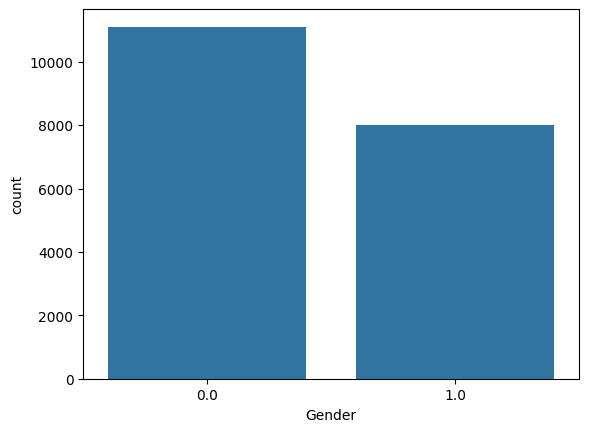

In [44]:
sns.countplot(x = "Gender",data = OLA)

In [45]:
OLA.dtypes

Unnamed: 0                      int64
MMM-YY                         object
Driver_ID                       int64
Age                           float64
Gender                        float64
City                           object
Education_Level                 int64
Income                          int64
Dateofjoining                  object
LastWorkingDate                 int64
Joining Designation             int64
Grade                           int64
Total Business Value            int64
Quarterly Rating                int64
Ride_Frequency_count            int64
Quarterly Rating_Frequency      int64
NEW_LastWorkingDate            object
dtype: object

In [46]:
OLA.isnull().sum()

Unnamed: 0                    0
MMM-YY                        0
Driver_ID                     0
Age                           0
Gender                        0
City                          0
Education_Level               0
Income                        0
Dateofjoining                 0
LastWorkingDate               0
Joining Designation           0
Grade                         0
Total Business Value          0
Quarterly Rating              0
Ride_Frequency_count          0
Quarterly Rating_Frequency    0
NEW_LastWorkingDate           0
dtype: int64

In [47]:
OLA["MMM-YY"] = pd.to_datetime(OLA["MMM-YY"])
OLA["Dateofjoining"] = pd.to_datetime(OLA["Dateofjoining"])

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_2476\1880178192.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  OLA["MMM-YY"] = pd.to_datetime(OLA["MMM-YY"])
C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_2476\1880178192.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  OLA["Dateofjoining"] = pd.to_datetime(OLA["Dateofjoining"])


feature engineering

In [48]:
OLA["Reporting_Month"]= OLA["MMM-YY"].dt.month
OLA["Reporting_year"]= OLA["MMM-YY"].dt.year

In [49]:
#OLA["Reporting_Month"] = pd.to_datetime(OLA["Reporting_Month"])
#OLA["Reporting_year"] = pd.to_datetime(OLA["Reporting_year"])

In [50]:
OLA.isnull().sum()

Unnamed: 0                    0
MMM-YY                        0
Driver_ID                     0
Age                           0
Gender                        0
City                          0
Education_Level               0
Income                        0
Dateofjoining                 0
LastWorkingDate               0
Joining Designation           0
Grade                         0
Total Business Value          0
Quarterly Rating              0
Ride_Frequency_count          0
Quarterly Rating_Frequency    0
NEW_LastWorkingDate           0
Reporting_Month               0
Reporting_year                0
dtype: int64

In [51]:
OLA.dtypes

Unnamed: 0                             int64
MMM-YY                        datetime64[ns]
Driver_ID                              int64
Age                                  float64
Gender                               float64
City                                  object
Education_Level                        int64
Income                                 int64
Dateofjoining                 datetime64[ns]
LastWorkingDate                        int64
Joining Designation                    int64
Grade                                  int64
Total Business Value                   int64
Quarterly Rating                       int64
Ride_Frequency_count                   int64
Quarterly Rating_Frequency             int64
NEW_LastWorkingDate                   object
Reporting_Month                        int32
Reporting_year                         int32
dtype: object

In [52]:
OLA = OLA.sort_values(by=["Driver_ID", "Reporting_year", "Reporting_Month"])

# Calculate the change in Quarterly Rating
change_rate= OLA.groupby("Driver_ID")["Quarterly Rating"].diff()
OLA["Change_in_Rating"] = OLA["Driver_ID"].map(change_rate)

# Calculate the change in Ride Frequency Count
#change_freq_ride = OLA.groupby("Driver_ID")["Ride_Frequency_count"].diff()
#OLA["Change_in_Ride_Frequency"]= OLA["Driver_ID"].map(change_freq_ride)

# Calculate percentage change in Total Business Value
pct_change= OLA.groupby("Driver_ID")["Total Business Value"].pct_change() * 100
OLA["Pct_Change_in_Business_Value"] = OLA["Driver_ID"].map(pct_change)


In [53]:
OLA["Pct_Change_in_Business_Value"].replace([np.inf, -np.inf], np.nan, inplace=True)
OLA["Pct_Change_in_Business_Value"].fillna(0, inplace=True)

In [54]:
OLA.dtypes

Unnamed: 0                               int64
MMM-YY                          datetime64[ns]
Driver_ID                                int64
Age                                    float64
Gender                                 float64
City                                    object
Education_Level                          int64
Income                                   int64
Dateofjoining                   datetime64[ns]
LastWorkingDate                          int64
Joining Designation                      int64
Grade                                    int64
Total Business Value                     int64
Quarterly Rating                         int64
Ride_Frequency_count                     int64
Quarterly Rating_Frequency               int64
NEW_LastWorkingDate                     object
Reporting_Month                          int32
Reporting_year                           int32
Change_in_Rating                       float64
Pct_Change_in_Business_Value           float64
dtype: object

In [55]:
#OLA_S = OLA.sort_values(by =["Driver_ID", "MMM-YY"],ascending = [True, False])

In [56]:
#OLA["Change_in_Ride_Frequency"].nunique()

In [57]:
OLA["Change_in_Rating"].nunique()

7

In [58]:
OLA[OLA["Driver_ID"] == 103]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,...,Grade,Total Business Value,Quarterly Rating,Ride_Frequency_count,Quarterly Rating_Frequency,NEW_LastWorkingDate,Reporting_Month,Reporting_year,Change_in_Rating,Pct_Change_in_Business_Value
699,699,2019-12-01,103,26.0,1.0,C28,1,68913,2019-11-30,0,...,2,0,1,8,8,still_active,12,2019,-1.0,-100.0
700,700,2020-01-01,103,26.0,1.0,C28,1,68913,2019-11-30,0,...,2,0,1,8,8,still_active,1,2020,-1.0,-100.0
701,701,2020-02-01,103,26.0,1.0,C28,1,68913,2019-11-30,0,...,2,350310,1,8,8,still_active,2,2020,-1.0,-100.0
702,702,2020-03-01,103,26.0,1.0,C28,1,68913,2019-11-30,0,...,2,150380,1,8,8,still_active,3,2020,-1.0,-100.0
703,703,2020-04-01,103,26.0,1.0,C28,1,68913,2019-11-30,0,...,2,0,1,8,8,still_active,4,2020,-1.0,-100.0
704,704,2020-05-01,103,26.0,1.0,C28,1,68913,2019-11-30,0,...,2,194000,1,8,8,still_active,5,2020,-1.0,-100.0
705,705,2020-06-01,103,26.0,1.0,C28,1,68913,2019-11-30,0,...,2,0,1,8,8,still_active,6,2020,-1.0,-100.0
706,706,2020-07-01,103,26.0,1.0,C28,1,68913,2019-11-30,1,...,2,-150310,1,8,8,churned,7,2020,-1.0,-100.0


In [59]:
#OLA_S.dtypes

In [60]:
agg_rules = {"MMM-YY": "max",
            "Age": "first",
            "Gender" :"first",
            "City" : "first",
            "Education_Level": "first",
            "Income": "mean",
            "Dateofjoining": "first",
            "LastWorkingDate": "max",
            "Grade": "first",
            "Total Business Value": "mean",
            "Quarterly Rating": "mean",
            "NEW_LastWorkingDate": "last",
            "Ride_Frequency_count": "first",
            "Quarterly Rating_Frequency" : "first",
            "Reporting_Month": "first",
            "Reporting_year": "first",
            "Change_in_Rating" : "first",       
            "Pct_Change_in_Business_Value":"first"}

NEW_OLA = OLA.groupby("Driver_ID").agg(agg_rules).reset_index()

In [61]:
NEW_OLA.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Quarterly Rating,NEW_LastWorkingDate,Ride_Frequency_count,Quarterly Rating_Frequency,Reporting_Month,Reporting_year,Change_in_Rating,Pct_Change_in_Business_Value
0,1,2019-03-01,28.0,0.0,C23,2,57387.0,2018-12-24,1,1,571860.0,2.0,churned,3,3,1,2019,0.0,-127.948897
1,2,2020-12-01,31.0,0.0,C7,2,67016.0,2020-11-06,0,2,0.0,1.0,still_active,2,2,11,2020,0.0,-100.000000
2,4,2020-04-01,43.0,0.0,C13,2,65603.0,2019-12-07,1,2,70000.0,1.0,churned,5,5,12,2019,0.0,0.000000
3,5,2019-03-01,29.0,0.0,C9,0,46368.0,2019-01-09,1,1,40120.0,1.0,churned,3,3,1,2019,NaN,0.000000
4,6,2020-12-01,31.0,1.0,C11,1,78728.0,2020-07-31,0,3,253000.0,1.6,still_active,5,5,8,2020,0.0,0.000000


In [62]:
NEW_OLA[NEW_OLA["Driver_ID"] == 103]

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Quarterly Rating,NEW_LastWorkingDate,Ride_Frequency_count,Quarterly Rating_Frequency,Reporting_Month,Reporting_year,Change_in_Rating,Pct_Change_in_Business_Value
84,103,2020-07-01,26.0,1.0,C28,1,68913.0,2019-11-30,1,2,68047.5,1.0,churned,8,8,12,2019,-1.0,-100.0


In [63]:
NEW_OLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Driver_ID                     2381 non-null   int64         
 1   MMM-YY                        2381 non-null   datetime64[ns]
 2   Age                           2381 non-null   float64       
 3   Gender                        2381 non-null   float64       
 4   City                          2381 non-null   object        
 5   Education_Level               2381 non-null   int64         
 6   Income                        2381 non-null   float64       
 7   Dateofjoining                 2381 non-null   datetime64[ns]
 8   LastWorkingDate               2381 non-null   int64         
 9   Grade                         2381 non-null   int64         
 10  Total Business Value          2381 non-null   float64       
 11  Quarterly Rating              

<Axes: xlabel='LastWorkingDate', ylabel='count'>

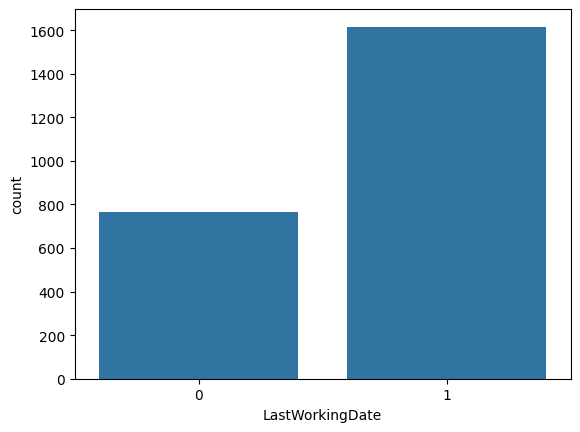

In [64]:
sns.countplot(data = NEW_OLA, x = "LastWorkingDate")

In [65]:
NEW_OLA.isnull().sum()

Driver_ID                         0
MMM-YY                            0
Age                               0
Gender                            0
City                              0
Education_Level                   0
Income                            0
Dateofjoining                     0
LastWorkingDate                   0
Grade                             0
Total Business Value              0
Quarterly Rating                  0
NEW_LastWorkingDate               0
Ride_Frequency_count              0
Quarterly Rating_Frequency        0
Reporting_Month                   0
Reporting_year                    0
Change_in_Rating                303
Pct_Change_in_Business_Value      0
dtype: int64

In [66]:
NEW_OLA.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Quarterly Rating,NEW_LastWorkingDate,Ride_Frequency_count,Quarterly Rating_Frequency,Reporting_Month,Reporting_year,Change_in_Rating,Pct_Change_in_Business_Value
0,1,2019-03-01,28.0,0.0,C23,2,57387.0,2018-12-24,1,1,571860.0,2.0,churned,3,3,1,2019,0.0,-127.948897
1,2,2020-12-01,31.0,0.0,C7,2,67016.0,2020-11-06,0,2,0.0,1.0,still_active,2,2,11,2020,0.0,-100.000000
2,4,2020-04-01,43.0,0.0,C13,2,65603.0,2019-12-07,1,2,70000.0,1.0,churned,5,5,12,2019,0.0,0.000000
3,5,2019-03-01,29.0,0.0,C9,0,46368.0,2019-01-09,1,1,40120.0,1.0,churned,3,3,1,2019,NaN,0.000000
4,6,2020-12-01,31.0,1.0,C11,1,78728.0,2020-07-31,0,3,253000.0,1.6,still_active,5,5,8,2020,0.0,0.000000


In [67]:
NEW_OLA["Dateofjoining_year"]= NEW_OLA["Dateofjoining"].dt.year

In [68]:
NEW_OLA["Dateofjoining_month"]= NEW_OLA["Dateofjoining"].dt.month

In [69]:
NEW_OLA.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Grade,...,Quarterly Rating,NEW_LastWorkingDate,Ride_Frequency_count,Quarterly Rating_Frequency,Reporting_Month,Reporting_year,Change_in_Rating,Pct_Change_in_Business_Value,Dateofjoining_year,Dateofjoining_month
0,1,2019-03-01,28.0,0.0,C23,2,57387.0,2018-12-24,1,1,...,2.0,churned,3,3,1,2019,0.0,-127.948897,2018,12
1,2,2020-12-01,31.0,0.0,C7,2,67016.0,2020-11-06,0,2,...,1.0,still_active,2,2,11,2020,0.0,-100.000000,2020,11
2,4,2020-04-01,43.0,0.0,C13,2,65603.0,2019-12-07,1,2,...,1.0,churned,5,5,12,2019,0.0,0.000000,2019,12
3,5,2019-03-01,29.0,0.0,C9,0,46368.0,2019-01-09,1,1,...,1.0,churned,3,3,1,2019,NaN,0.000000,2019,1
4,6,2020-12-01,31.0,1.0,C11,1,78728.0,2020-07-31,0,3,...,1.6,still_active,5,5,8,2020,0.0,0.000000,2020,7


<Axes: xlabel='Quarterly Rating', ylabel='Density'>

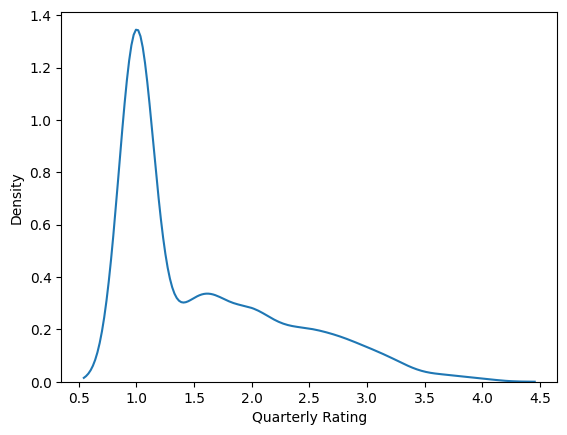

In [70]:
sns.kdeplot(data = NEW_OLA, x  = "Quarterly Rating")

<Axes: xlabel='LastWorkingDate', ylabel='Density'>

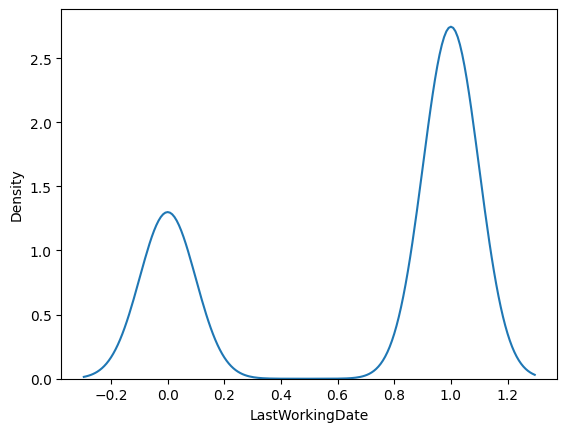

In [71]:
sns.kdeplot(data = NEW_OLA, x  = "LastWorkingDate")

<Axes: xlabel='Gender', ylabel='Density'>

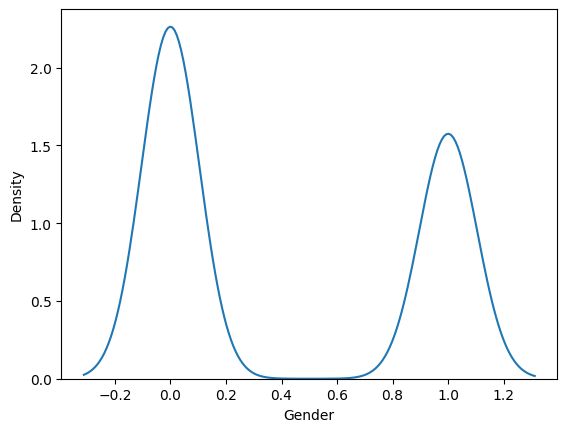

In [72]:
sns.kdeplot(data = NEW_OLA, x  = "Gender")

In [73]:
NEW_OLA["Age"].value_counts()

Age
32.0    179
33.0    167
30.0    159
31.0    156
35.0    156
29.0    148
34.0    139
36.0    128
28.0    125
27.0    118
38.0    103
26.0     95
37.0     92
39.0     82
25.0     79
41.0     67
40.0     55
24.0     52
23.0     47
42.0     42
43.0     40
44.0     32
45.0     30
46.0     19
22.0     18
47.0     10
48.0      9
51.0      8
49.0      7
21.0      7
50.0      5
52.0      4
54.0      1
58.0      1
53.0      1
Name: count, dtype: int64

imbalance data

In [74]:
NEW_OLA["NEW_LastWorkingDate"].value_counts()

NEW_LastWorkingDate
churned         1616
still_active     765
Name: count, dtype: int64

In [75]:
NEW_OLA["Quarterly Rating"].value_counts()

Quarterly Rating
1.000000    1202
2.000000     116
1.600000      88
1.750000      72
2.500000      69
            ... 
2.136364       1
2.722222       1
2.578947       1
2.857143       1
1.882353       1
Name: count, Length: 163, dtype: int64

In [76]:
NEW_OLA["Total Business Value"].value_counts()

Total Business Value
0.000000         719
40000.000000       4
25000.000000       3
125000.000000      3
100000.000000      3
                ... 
188380.000000      1
549891.666667      1
359868.181818      1
101193.333333      1
328320.000000      1
Name: count, Length: 1639, dtype: int64

C:\Users\satheeskumar\apps\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Total Business Value', ylabel='Density'>

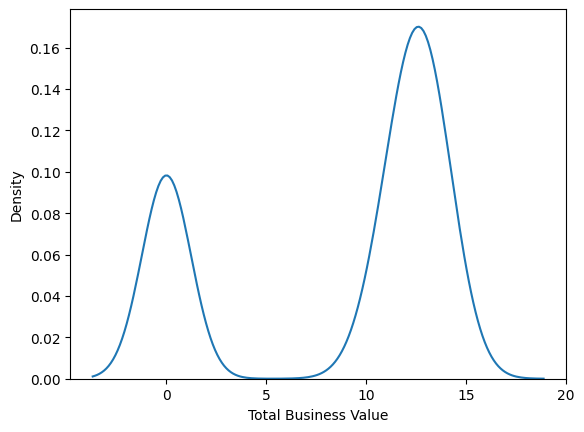

In [77]:
sns.kdeplot(x = np.log1p(NEW_OLA['Total Business Value']), data = NEW_OLA)

In [78]:
NEW_OLA['Total Business Value'] = np.log1p(NEW_OLA['Total Business Value'] - NEW_OLA['Total Business Value'].min() + 1)

<Axes: xlabel='Total Business Value', ylabel='Density'>

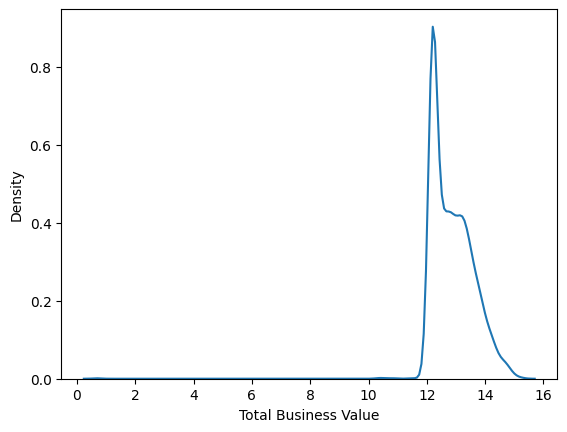

In [79]:
sns.kdeplot(x = 'Total Business Value', data = NEW_OLA)

<Axes: xlabel='Income', ylabel='Density'>

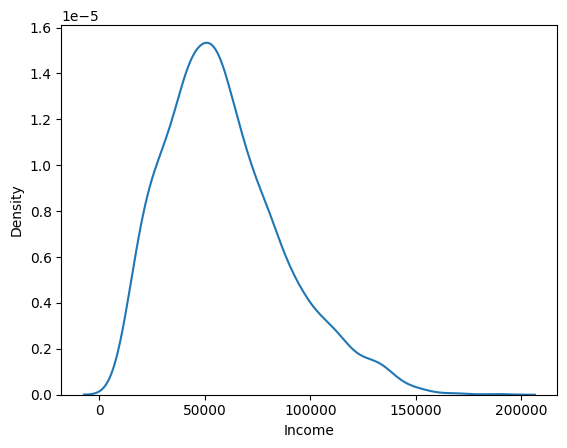

In [80]:
sns.kdeplot(x = 'Income', data = NEW_OLA)

In [81]:
NEW_OLA['Income'] = np.log1p(NEW_OLA['Income'])  # Log transform

<Axes: xlabel='Income', ylabel='Density'>

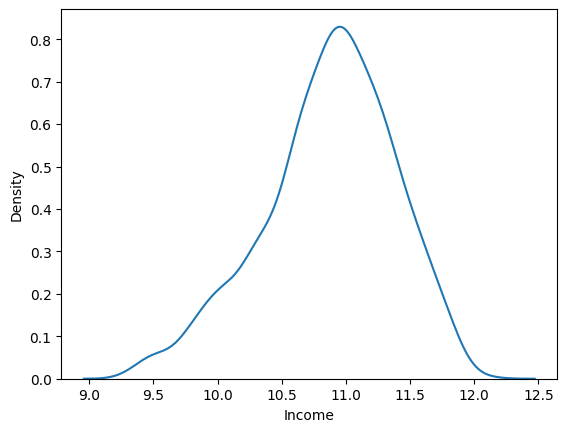

In [82]:
sns.kdeplot(x = 'Income', data = NEW_OLA)

In [83]:
NEW_OLA["Grade"].value_counts()

Grade
2    866
1    751
3    611
4    132
5     21
Name: count, dtype: int64

<Axes: xlabel='Grade', ylabel='Density'>

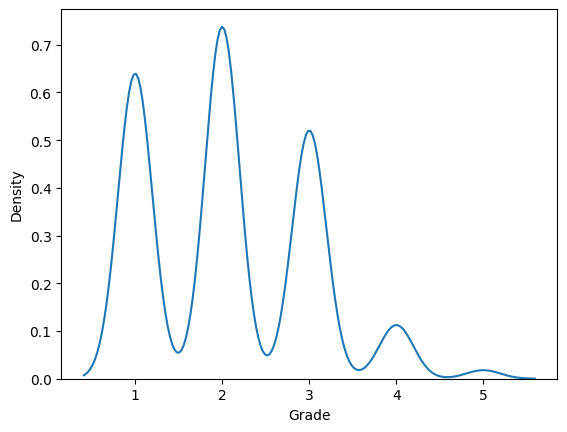

In [84]:
sns.kdeplot(x = 'Grade', data = NEW_OLA)

In [85]:
NEW_OLA["Age"].describe()

count    2381.000000
mean       33.090718
std         5.840686
min        21.000000
25%        29.000000
50%        33.000000
75%        37.000000
max        58.000000
Name: Age, dtype: float64

In [86]:
NEW_OLA["Age"]= pd.cut(NEW_OLA["Age"],bins = [18, 30, 45, 60], labels = ["Young", "Adult", "Middle-Age"])

In [87]:
NEW_OLA["Age"].value_counts()

Age
Adult         1468
Young          848
Middle-Age      65
Name: count, dtype: int64

In [88]:
NEW_OLA['Quarterly Rating'].value_counts()


Quarterly Rating
1.000000    1202
2.000000     116
1.600000      88
1.750000      72
2.500000      69
            ... 
2.136364       1
2.722222       1
2.578947       1
2.857143       1
1.882353       1
Name: count, Length: 163, dtype: int64

In [89]:
NEW_OLA["Quarterly Rating"].describe()

count    2381.000000
mean        1.566304
std         0.719652
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Quarterly Rating, dtype: float64

In [90]:
NEW_OLA['Quarterly Rating'] = NEW_OLA['Quarterly Rating'].round()

In [91]:
NEW_OLA['Quarterly Rating'].value_counts()

Quarterly Rating
1.0    1353
2.0     725
3.0     269
4.0      34
Name: count, dtype: int64

In [92]:
NEW_OLA.isnull().sum()

Driver_ID                         0
MMM-YY                            0
Age                               0
Gender                            0
City                              0
Education_Level                   0
Income                            0
Dateofjoining                     0
LastWorkingDate                   0
Grade                             0
Total Business Value              0
Quarterly Rating                  0
NEW_LastWorkingDate               0
Ride_Frequency_count              0
Quarterly Rating_Frequency        0
Reporting_Month                   0
Reporting_year                    0
Change_in_Rating                303
Pct_Change_in_Business_Value      0
Dateofjoining_year                0
Dateofjoining_month               0
dtype: int64

In [93]:
NEW_OLA['Low_Ride_Frequency'] = NEW_OLA['Ride_Frequency_count'].apply(lambda x: 1 if x < 5 else 0)

In [94]:
NEW_OLA['low_Quarterly_Rating'] = NEW_OLA['Quarterly Rating'].apply(lambda x: 1 if x < 2.5 else 0)

In [95]:
NEW_OLA.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Grade,...,Ride_Frequency_count,Quarterly Rating_Frequency,Reporting_Month,Reporting_year,Change_in_Rating,Pct_Change_in_Business_Value,Dateofjoining_year,Dateofjoining_month,Low_Ride_Frequency,low_Quarterly_Rating
0,1,2019-03-01,Young,0.0,C23,2,10.957591,2018-12-24,1,1,...,3,3,1,2019,0.0,-127.948897,2018,12,1,1
1,2,2020-12-01,Adult,0.0,C7,2,11.112702,2020-11-06,0,2,...,2,2,11,2020,0.0,-100.000000,2020,11,1,1
2,4,2020-04-01,Adult,0.0,C13,2,11.091392,2019-12-07,1,2,...,5,5,12,2019,0.0,0.000000,2019,12,0,1
3,5,2019-03-01,Young,0.0,C9,0,10.744386,2019-01-09,1,1,...,3,3,1,2019,NaN,0.000000,2019,1,1,1
4,6,2020-12-01,Adult,1.0,C11,1,11.273767,2020-07-31,0,3,...,5,5,8,2020,0.0,0.000000,2020,7,0,1


<Axes: xlabel='Pct_Change_in_Business_Value', ylabel='Density'>

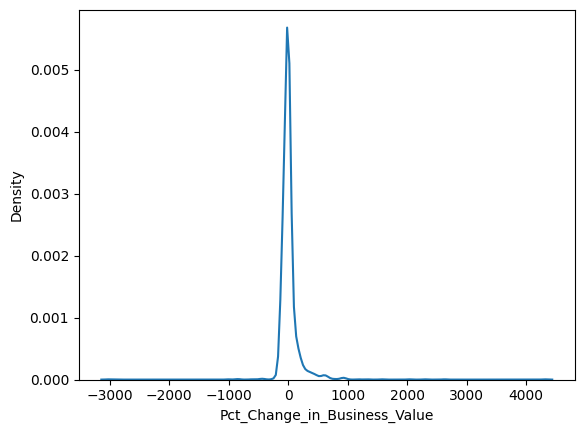

In [96]:
sns.kdeplot(x = 'Pct_Change_in_Business_Value', data = NEW_OLA)

<Axes: xlabel='Change_in_Rating', ylabel='Density'>

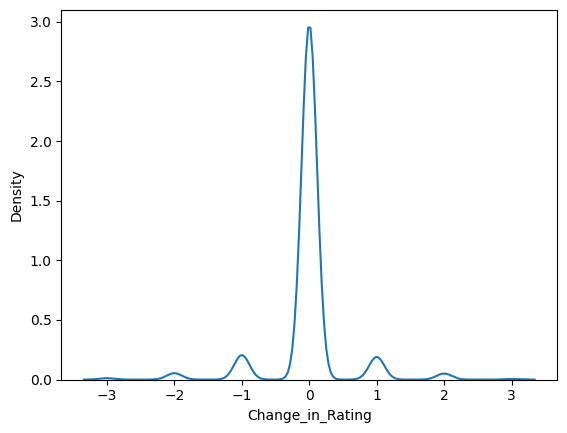

In [97]:
sns.kdeplot(x = 'Change_in_Rating', data = NEW_OLA)

<Axes: xlabel='Ride_Frequency_count', ylabel='Density'>

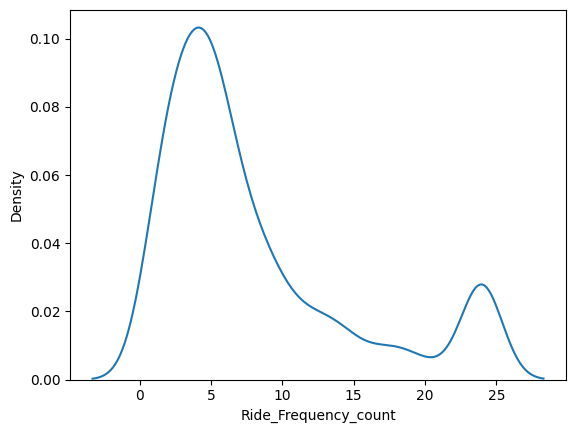

In [98]:
sns.kdeplot(x = 'Ride_Frequency_count', data = NEW_OLA)

In [99]:
NEW_OLA['Ride_Frequency_count'] = np.log1p(NEW_OLA['Ride_Frequency_count'])

<Axes: xlabel='Ride_Frequency_count', ylabel='Density'>

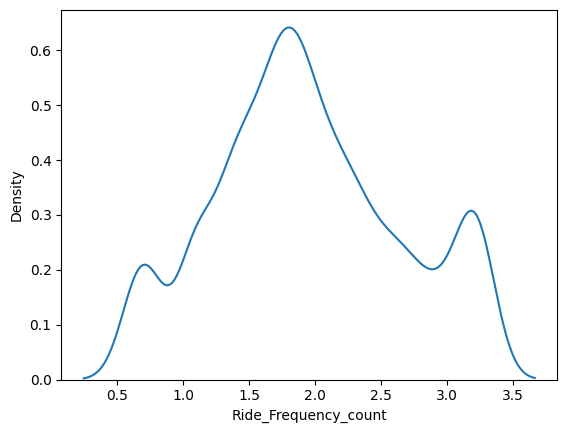

In [100]:
sns.kdeplot(x = 'Ride_Frequency_count', data = NEW_OLA)

<Axes: xlabel='Quarterly Rating_Frequency', ylabel='Density'>

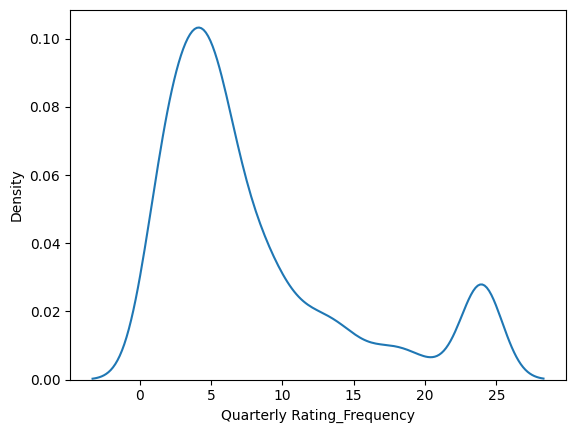

In [101]:
sns.kdeplot(x = 'Quarterly Rating_Frequency', data = NEW_OLA)

In [102]:
NEW_OLA['Quarterly Rating_Frequency'] = np.log1p(NEW_OLA['Quarterly Rating_Frequency'])

<Axes: xlabel='Quarterly Rating_Frequency', ylabel='Density'>

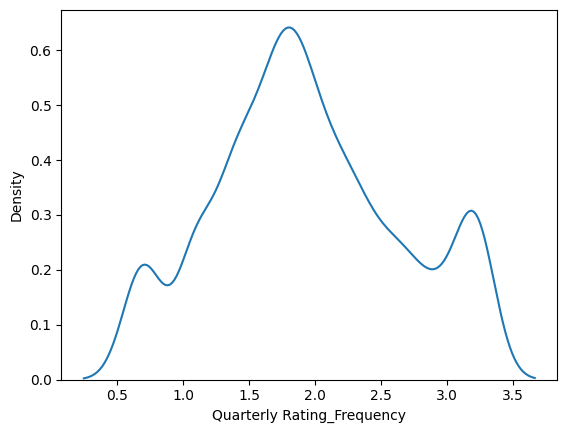

In [103]:
sns.kdeplot(x = 'Quarterly Rating_Frequency', data = NEW_OLA)

In [104]:
# Compute the average ride frequency per city
city_avg_rides = np.round(NEW_OLA.groupby("City")["Ride_Frequency_count"].mean(),2)

# Map the average values back to the original dataframe
NEW_OLA["Average_city_ride"] = NEW_OLA["City"].map(city_avg_rides)

In [105]:
NEW_OLA.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Grade,...,Quarterly Rating_Frequency,Reporting_Month,Reporting_year,Change_in_Rating,Pct_Change_in_Business_Value,Dateofjoining_year,Dateofjoining_month,Low_Ride_Frequency,low_Quarterly_Rating,Average_city_ride
0,1,2019-03-01,Young,0.0,C23,2,10.957591,2018-12-24,1,1,...,1.386294,1,2019,0.0,-127.948897,2018,12,1,1,1.94
1,2,2020-12-01,Adult,0.0,C7,2,11.112702,2020-11-06,0,2,...,1.098612,11,2020,0.0,-100.000000,2020,11,1,1,1.94
2,4,2020-04-01,Adult,0.0,C13,2,11.091392,2019-12-07,1,2,...,1.791759,12,2019,0.0,0.000000,2019,12,0,1,1.93
3,5,2019-03-01,Young,0.0,C9,0,10.744386,2019-01-09,1,1,...,1.386294,1,2019,NaN,0.000000,2019,1,1,1,1.82
4,6,2020-12-01,Adult,1.0,C11,1,11.273767,2020-07-31,0,3,...,1.791759,8,2020,0.0,0.000000,2020,7,0,1,1.87


In [106]:
NEW_OLA.dtypes

Driver_ID                                int64
MMM-YY                          datetime64[ns]
Age                                   category
Gender                                 float64
City                                    object
Education_Level                          int64
Income                                 float64
Dateofjoining                   datetime64[ns]
LastWorkingDate                          int64
Grade                                    int64
Total Business Value                   float64
Quarterly Rating                       float64
NEW_LastWorkingDate                     object
Ride_Frequency_count                   float64
Quarterly Rating_Frequency             float64
Reporting_Month                          int32
Reporting_year                           int32
Change_in_Rating                       float64
Pct_Change_in_Business_Value           float64
Dateofjoining_year                       int32
Dateofjoining_month                      int32
Low_Ride_Freq

In [107]:
 count_attrition = NEW_OLA.groupby("City")["LastWorkingDate"].sum()
NEW_OLA["City_Attrition_count"] = NEW_OLA["City"].map(count_attrition)

In [108]:
NEW_OLA.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Grade,...,Reporting_Month,Reporting_year,Change_in_Rating,Pct_Change_in_Business_Value,Dateofjoining_year,Dateofjoining_month,Low_Ride_Frequency,low_Quarterly_Rating,Average_city_ride,City_Attrition_count
0,1,2019-03-01,Young,0.0,C23,2,10.957591,2018-12-24,1,1,...,1,2019,0.0,-127.948897,2018,12,1,1,1.94,57
1,2,2020-12-01,Adult,0.0,C7,2,11.112702,2020-11-06,0,2,...,11,2020,0.0,-100.000000,2020,11,1,1,1.94,52
2,4,2020-04-01,Adult,0.0,C13,2,11.091392,2019-12-07,1,2,...,12,2019,0.0,0.000000,2019,12,0,1,1.93,58
3,5,2019-03-01,Young,0.0,C9,0,10.744386,2019-01-09,1,1,...,1,2019,NaN,0.000000,2019,1,1,1,1.82,53
4,6,2020-12-01,Adult,1.0,C11,1,11.273767,2020-07-31,0,3,...,8,2020,0.0,0.000000,2020,7,0,1,1.87,45


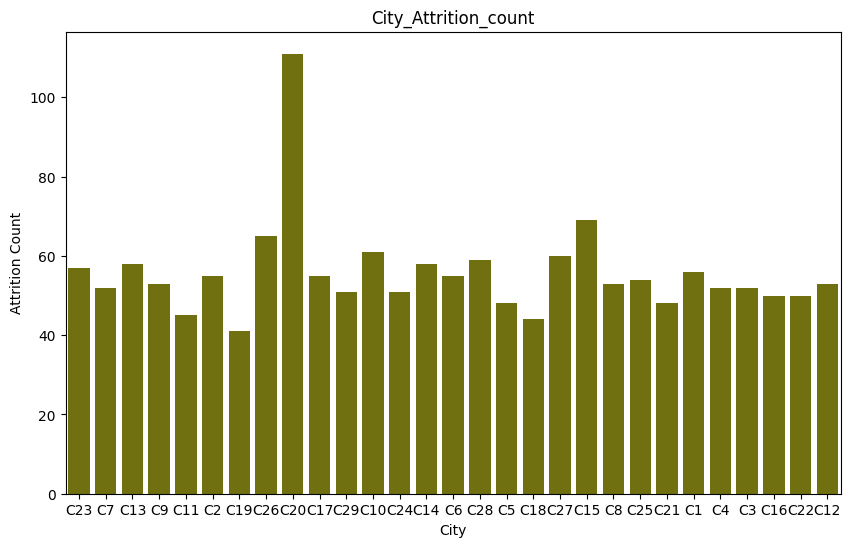

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(y =NEW_OLA['City_Attrition_count'],x = NEW_OLA["City"],color='olive')  # Assuming 'City' and 'Attrition_count' columns exist
plt.xlabel('City')
plt.ylabel('Attrition Count')
plt.title('City_Attrition_count')
#plt.gca().invert_yaxis()  # Uncomment if you want to invert the y-axis order
plt.show()

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_2476\3525186828.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:olive'` for the same effect.

  sns.countplot(y=NEW_OLA['City_Attrition_count'], hue=NEW_OLA["Age"], color='olive')  # Use hue for categorizing by Age


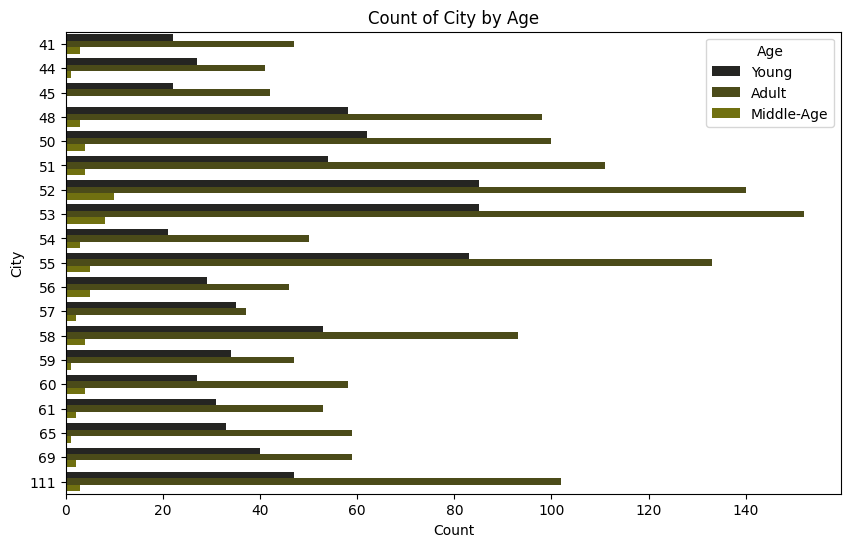

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(y=NEW_OLA['City_Attrition_count'], hue=NEW_OLA["Age"], color='olive')  # Use hue for categorizing by Age
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count of City by Age')
plt.show()


C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_2476\1679398911.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:olive'` for the same effect.

  sns.countplot(y =NEW_OLA['City_Attrition_count'],hue = NEW_OLA["Gender"],color='olive')  # Assuming 'City' and 'Attrition_count' columns exist


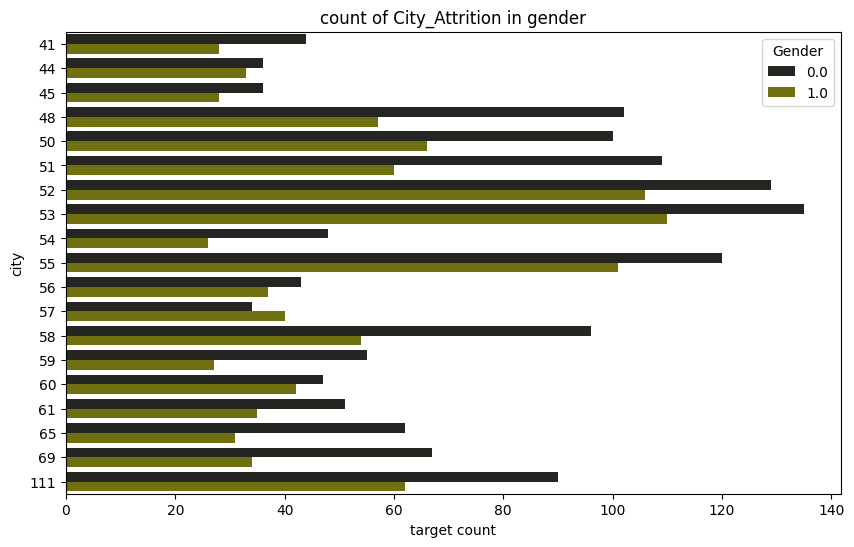

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(y =NEW_OLA['City_Attrition_count'],hue = NEW_OLA["Gender"],color='olive')  # Assuming 'City' and 'Attrition_count' columns exist
plt.xlabel('target count')
plt.ylabel('city')
plt.title('count of City_Attrition in gender')
#plt.gca().invert_yaxis()  # Uncomment if you want to invert the y-axis order
plt.show()

In [112]:
city_business = NEW_OLA.groupby("City")["Total Business Value"].median()
NEW_OLA["city_Median_business_value"] = NEW_OLA["City"].map(city_business)

In [113]:
NEW_OLA.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Grade,...,Reporting_year,Change_in_Rating,Pct_Change_in_Business_Value,Dateofjoining_year,Dateofjoining_month,Low_Ride_Frequency,low_Quarterly_Rating,Average_city_ride,City_Attrition_count,city_Median_business_value
0,1,2019-03-01,Young,0.0,C23,2,10.957591,2018-12-24,1,1,...,2019,0.0,-127.948897,2018,12,1,1,1.94,57,12.861915
1,2,2020-12-01,Adult,0.0,C7,2,11.112702,2020-11-06,0,2,...,2020,0.0,-100.000000,2020,11,1,1,1.94,52,12.773632
2,4,2020-04-01,Adult,0.0,C13,2,11.091392,2019-12-07,1,2,...,2019,0.0,0.000000,2019,12,0,1,1.93,58,12.663450
3,5,2019-03-01,Young,0.0,C9,0,10.744386,2019-01-09,1,1,...,2019,NaN,0.000000,2019,1,1,1,1.82,53,12.660365
4,6,2020-12-01,Adult,1.0,C11,1,11.273767,2020-07-31,0,3,...,2020,0.0,0.000000,2020,7,0,1,1.87,45,12.676024


In [114]:
# Sort the data by Driver_ID and Reporting Month/Year


In [115]:
NEW_OLA.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Grade,...,Reporting_year,Change_in_Rating,Pct_Change_in_Business_Value,Dateofjoining_year,Dateofjoining_month,Low_Ride_Frequency,low_Quarterly_Rating,Average_city_ride,City_Attrition_count,city_Median_business_value
0,1,2019-03-01,Young,0.0,C23,2,10.957591,2018-12-24,1,1,...,2019,0.0,-127.948897,2018,12,1,1,1.94,57,12.861915
1,2,2020-12-01,Adult,0.0,C7,2,11.112702,2020-11-06,0,2,...,2020,0.0,-100.000000,2020,11,1,1,1.94,52,12.773632
2,4,2020-04-01,Adult,0.0,C13,2,11.091392,2019-12-07,1,2,...,2019,0.0,0.000000,2019,12,0,1,1.93,58,12.663450
3,5,2019-03-01,Young,0.0,C9,0,10.744386,2019-01-09,1,1,...,2019,NaN,0.000000,2019,1,1,1,1.82,53,12.660365
4,6,2020-12-01,Adult,1.0,C11,1,11.273767,2020-07-31,0,3,...,2020,0.0,0.000000,2020,7,0,1,1.87,45,12.676024


In [116]:
NEW_OLA.isnull().sum()

Driver_ID                         0
MMM-YY                            0
Age                               0
Gender                            0
City                              0
Education_Level                   0
Income                            0
Dateofjoining                     0
LastWorkingDate                   0
Grade                             0
Total Business Value              0
Quarterly Rating                  0
NEW_LastWorkingDate               0
Ride_Frequency_count              0
Quarterly Rating_Frequency        0
Reporting_Month                   0
Reporting_year                    0
Change_in_Rating                303
Pct_Change_in_Business_Value      0
Dateofjoining_year                0
Dateofjoining_month               0
Low_Ride_Frequency                0
low_Quarterly_Rating              0
Average_city_ride                 0
City_Attrition_count              0
city_Median_business_value        0
dtype: int64

In [117]:
NEW_OLA["Change_in_Rating"] = NEW_OLA["Change_in_Rating"].fillna(0)
NEW_OLA["Pct_Change_in_Business_Value"] = NEW_OLA["Pct_Change_in_Business_Value"].fillna(0)

In [118]:
NEW_OLA.isnull().sum()

Driver_ID                       0
MMM-YY                          0
Age                             0
Gender                          0
City                            0
Education_Level                 0
Income                          0
Dateofjoining                   0
LastWorkingDate                 0
Grade                           0
Total Business Value            0
Quarterly Rating                0
NEW_LastWorkingDate             0
Ride_Frequency_count            0
Quarterly Rating_Frequency      0
Reporting_Month                 0
Reporting_year                  0
Change_in_Rating                0
Pct_Change_in_Business_Value    0
Dateofjoining_year              0
Dateofjoining_month             0
Low_Ride_Frequency              0
low_Quarterly_Rating            0
Average_city_ride               0
City_Attrition_count            0
city_Median_business_value      0
dtype: int64

In [119]:
NEW_OLA.drop("MMM-YY",axis = 1,inplace = True)
NEW_OLA.drop("Dateofjoining",axis = 1,inplace = True)

In [120]:
NEW_OLA.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'LastWorkingDate', 'Grade', 'Total Business Value', 'Quarterly Rating',
       'NEW_LastWorkingDate', 'Ride_Frequency_count',
       'Quarterly Rating_Frequency', 'Reporting_Month', 'Reporting_year',
       'Change_in_Rating', 'Pct_Change_in_Business_Value',
       'Dateofjoining_year', 'Dateofjoining_month', 'Low_Ride_Frequency',
       'low_Quarterly_Rating', 'Average_city_ride', 'City_Attrition_count',
       'city_Median_business_value'],
      dtype='object')

In [121]:
encoding_grade = [[1,2,3,4,5]]
encoding = OrdinalEncoder(categories=encoding_grade)
NEW_OLA["Grade"] = encoding.fit_transform(NEW_OLA[["Grade"]])

In [122]:
NEW_OLA.dtypes

Driver_ID                          int64
Age                             category
Gender                           float64
City                              object
Education_Level                    int64
Income                           float64
LastWorkingDate                    int64
Grade                            float64
Total Business Value             float64
Quarterly Rating                 float64
NEW_LastWorkingDate               object
Ride_Frequency_count             float64
Quarterly Rating_Frequency       float64
Reporting_Month                    int32
Reporting_year                     int32
Change_in_Rating                 float64
Pct_Change_in_Business_Value     float64
Dateofjoining_year                 int32
Dateofjoining_month                int32
Low_Ride_Frequency                 int64
low_Quarterly_Rating               int64
Average_city_ride                float64
City_Attrition_count               int64
city_Median_business_value       float64
dtype: object

In [123]:
print(NEW_OLA['Education_Level'].value_counts())

Education_Level
2    802
1    795
0    784
Name: count, dtype: int64


In [124]:
NEW_OLA['Gender'] = NEW_OLA['Gender'].astype("int")
print(NEW_OLA['Gender'].value_counts())

Gender
0    1404
1     977
Name: count, dtype: int64


In [125]:
NEW_OLA["Age"]

0       Young
1       Adult
2       Adult
3       Young
4       Adult
        ...  
2376    Adult
2377    Adult
2378    Adult
2379    Young
2380    Young
Name: Age, Length: 2381, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Middle-Age']

In [126]:
from sklearn.preprocessing import OrdinalEncoder

# Define categories as a single list for one feature
age_categories = [['Young', 'Adult', 'Middle-Age']]  # One feature, ordered categories

# Initialize the encoder with the correct categories
encoder = OrdinalEncoder(categories=age_categories)

# Transform the Age column (ensure it's in 2D format for the encoder)
NEW_OLA["Age"] = encoder.fit_transform(NEW_OLA[["Age"]])


In [127]:
NEW_OLA["City"].value_counts()

City
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: count, dtype: int64

In [128]:
LABEL_ENCODER = LabelEncoder()
NEW_OLA["City"] = LABEL_ENCODER.fit_transform(NEW_OLA["City"])

In [129]:
NEW_OLA.dtypes

Driver_ID                         int64
Age                             float64
Gender                            int32
City                              int32
Education_Level                   int64
Income                          float64
LastWorkingDate                   int64
Grade                           float64
Total Business Value            float64
Quarterly Rating                float64
NEW_LastWorkingDate              object
Ride_Frequency_count            float64
Quarterly Rating_Frequency      float64
Reporting_Month                   int32
Reporting_year                    int32
Change_in_Rating                float64
Pct_Change_in_Business_Value    float64
Dateofjoining_year                int32
Dateofjoining_month               int32
Low_Ride_Frequency                int64
low_Quarterly_Rating              int64
Average_city_ride               float64
City_Attrition_count              int64
city_Median_business_value      float64
dtype: object

In [130]:
NEW_OLA["City"].value_counts()

City
12    152
6     101
21     96
18     93
27     89
19     89
1      86
7      84
14     82
22     82
20     82
3      81
24     80
0      80
13     79
5      79
25     78
23     77
26     76
28     75
17     74
15     74
16     73
10     72
11     72
8      71
4      71
9      69
2      64
Name: count, dtype: int64

In [131]:
len(NEW_OLA.columns)

24

In [132]:
NEW_OLA.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Grade,Total Business Value,Quarterly Rating,...,Reporting_year,Change_in_Rating,Pct_Change_in_Business_Value,Dateofjoining_year,Dateofjoining_month,Low_Ride_Frequency,low_Quarterly_Rating,Average_city_ride,City_Attrition_count,city_Median_business_value
0,1,0.0,0,15,2,10.957591,1,0.0,13.553879,2.0,...,2019,0.0,-127.948897,2018,12,1,1,1.94,57,12.861915
1,2,1.0,0,26,2,11.112702,0,1.0,12.195693,1.0,...,2020,0.0,-100.000000,2020,11,1,1,1.94,52,12.773632
2,4,1.0,0,4,2,11.091392,1,1.0,12.498499,1.0,...,2019,0.0,0.000000,2019,12,0,1,1.93,58,12.663450
3,5,0.0,0,28,0,10.744386,1,0.0,12.380256,1.0,...,2019,0.0,0.000000,2019,1,1,1,1.82,53,12.660365
4,6,1.0,1,2,1,11.273767,0,2.0,13.019078,2.0,...,2020,0.0,0.000000,2020,7,0,1,1.87,45,12.676024


In [133]:
def bools(final_ds):
    for i in final_ds.columns:
        if final_ds[i].dtypes == "bool":
            final_ds[i]= final_ds[i].astype("int")

In [134]:
bools(NEW_OLA)

In [135]:
NEW_OLA.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Grade,Total Business Value,Quarterly Rating,...,Reporting_year,Change_in_Rating,Pct_Change_in_Business_Value,Dateofjoining_year,Dateofjoining_month,Low_Ride_Frequency,low_Quarterly_Rating,Average_city_ride,City_Attrition_count,city_Median_business_value
0,1,0.0,0,15,2,10.957591,1,0.0,13.553879,2.0,...,2019,0.0,-127.948897,2018,12,1,1,1.94,57,12.861915
1,2,1.0,0,26,2,11.112702,0,1.0,12.195693,1.0,...,2020,0.0,-100.000000,2020,11,1,1,1.94,52,12.773632
2,4,1.0,0,4,2,11.091392,1,1.0,12.498499,1.0,...,2019,0.0,0.000000,2019,12,0,1,1.93,58,12.663450
3,5,0.0,0,28,0,10.744386,1,0.0,12.380256,1.0,...,2019,0.0,0.000000,2019,1,1,1,1.82,53,12.660365
4,6,1.0,1,2,1,11.273767,0,2.0,13.019078,2.0,...,2020,0.0,0.000000,2020,7,0,1,1.87,45,12.676024


In [136]:
def drops(x,columns):
    x=x.drop(columns,axis =1, inplace = True)

In [137]:
drops(NEW_OLA,["NEW_LastWorkingDate"])

In [138]:
NEW_OLA.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'LastWorkingDate', 'Grade', 'Total Business Value', 'Quarterly Rating',
       'Ride_Frequency_count', 'Quarterly Rating_Frequency', 'Reporting_Month',
       'Reporting_year', 'Change_in_Rating', 'Pct_Change_in_Business_Value',
       'Dateofjoining_year', 'Dateofjoining_month', 'Low_Ride_Frequency',
       'low_Quarterly_Rating', 'Average_city_ride', 'City_Attrition_count',
       'city_Median_business_value'],
      dtype='object')

In [139]:
drops(NEW_OLA,["Driver_ID"])

In [140]:
NEW_OLA.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Income', 'LastWorkingDate',
       'Grade', 'Total Business Value', 'Quarterly Rating',
       'Ride_Frequency_count', 'Quarterly Rating_Frequency', 'Reporting_Month',
       'Reporting_year', 'Change_in_Rating', 'Pct_Change_in_Business_Value',
       'Dateofjoining_year', 'Dateofjoining_month', 'Low_Ride_Frequency',
       'low_Quarterly_Rating', 'Average_city_ride', 'City_Attrition_count',
       'city_Median_business_value'],
      dtype='object')

In [141]:
NEW_OLA.dtypes

Age                             float64
Gender                            int32
City                              int32
Education_Level                   int64
Income                          float64
LastWorkingDate                   int64
Grade                           float64
Total Business Value            float64
Quarterly Rating                float64
Ride_Frequency_count            float64
Quarterly Rating_Frequency      float64
Reporting_Month                   int32
Reporting_year                    int32
Change_in_Rating                float64
Pct_Change_in_Business_Value    float64
Dateofjoining_year                int32
Dateofjoining_month               int32
Low_Ride_Frequency                int64
low_Quarterly_Rating              int64
Average_city_ride               float64
City_Attrition_count              int64
city_Median_business_value      float64
dtype: object

In [142]:
NEW_OLA.shape

(2381, 22)

In [143]:
Y = NEW_OLA["LastWorkingDate"]
X = NEW_OLA.drop("LastWorkingDate", axis = 1)

In [144]:
X_train_val,X_test,Y_train_val,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [145]:
print(type(X), type(Y))
print(X.shape if X is not None else "X is None")
print(Y.shape if Y is not None else "Y is None")


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(2381, 21)
(2381,)


In [146]:
X_train,X_val,Y_train,Y_val = train_test_split(X_train_val,Y_train_val, test_size = 0.25, random_state = 42)

In [147]:
#scaler = MinMaxScaler()
#X_train_scaler = scaler.fit_transform(X_train)
#X_val_scaler = scaler.transform(X_val)
#X_test_scaler = scaler.transform(X_test)

In [148]:
X_train.shape

(1428, 21)

In [149]:
Y_val.shape

(476,)

In [150]:
Y_test.shape

(477,)

randomforest model

In [151]:
RF = RandomForestClassifier(n_estimators = 100, max_depth= 4,random_state = 42, class_weight = "balanced")
RF.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [152]:
y_pred= RF.predict(X_val)
print(accuracy_score(Y_val,y_pred))
print(classification_report(Y_val,y_pred))
print(confusion_matrix(Y_val,y_pred))

0.8760504201680672
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       142
           1       0.95      0.87      0.91       334

    accuracy                           0.88       476
   macro avg       0.85      0.88      0.86       476
weighted avg       0.89      0.88      0.88       476

[[128  14]
 [ 45 289]]


In [153]:
print(RF.score(X_train, Y_train))
print(RF.score(X_val, Y_val))

0.9159663865546218
0.8760504201680672


In [154]:
parms = {"n_estimators" : [50,100,150,200], "max_depth" : [2,3,4],"max_features": ["sqrt", "log2", 0.5],
    "max_samples": [0.6, 0.8, None]}
RF = RandomForestClassifier(class_weight = "balanced")
gs = GridSearchCV(RF,parms,cv = 3 )
gs.fit(X_train,Y_train)

def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(gs)

y_pred= gs.predict(X_val)
print(accuracy_score(Y_val,y_pred))
print(classification_report(Y_val,y_pred))
print(confusion_matrix(Y_val,y_pred))

Best parameters are : {'max_depth': 4, 'max_features': 0.5, 'max_samples': 0.8, 'n_estimators': 50}
The score is : 0.9194677871148459
0.8886554621848739
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       142
           1       0.96      0.87      0.92       334

    accuracy                           0.89       476
   macro avg       0.86      0.90      0.87       476
weighted avg       0.90      0.89      0.89       476

[[131  11]
 [ 42 292]]


In [155]:
print(gs.score(X_train, Y_train))
print(gs.score(X_val, Y_val))

0.9292717086834734
0.8886554621848739


In [156]:
rf_final_mod  = RandomForestClassifier(class_weight = "balanced", 
                                      max_depth= 4, max_features =0.5,
                                      max_samples =None, n_estimators= 100)
rf_final_mod.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=0.5)

In [157]:
Y_pred= rf_final_mod.predict(X_test)
print(f'Accuracy : {accuracy_score(Y_test,Y_pred)}')
print(f'classification_report : {classification_report(Y_test,Y_pred)}')
print(f' confusion_matrix : {confusion_matrix(Y_test,Y_pred)}')
print(f' precision : {precision_score(Y_test,Y_pred)}')
print(f' f1_score : {f1_score(Y_test,Y_pred)}')
print(f' recall_score : {recall_score(Y_test,Y_pred)}')
print(f'Train_score : {rf_final_mod.score(X_train, Y_train)}')
print(f'test_score : {rf_final_mod.score(X_test, Y_test)}')

Accuracy : 0.9203354297693921
classification_report :               precision    recall  f1-score   support

           0       0.83      0.95      0.88       150
           1       0.97      0.91      0.94       327

    accuracy                           0.92       477
   macro avg       0.90      0.93      0.91       477
weighted avg       0.93      0.92      0.92       477

 confusion_matrix : [[142   8]
 [ 30 297]]
 precision : 0.9737704918032787
 f1_score : 0.939873417721519
 recall_score : 0.908256880733945
Train_score : 0.9278711484593838
test_score : 0.9203354297693921


Objective

The primary goal of this study was to analyze the dataset to predict driver attrition at Ola using ensemble learning techniques. The task aimed to develop a robust predictive model that could help identify drivers at risk of attrition and provide actionable insights to reduce churn, ensuring sustainable operations and enhanced workforce management.

A Random Forest Classifier, a robust ensemble learning technique, was employed. Random Forest is well-suited for classification tasks, offering high accuracy, handling imbalanced datasets effectively, and mitigating overfitting.

Model Performance Highlights:

Accuracy: 92.87% – Indicates the model is highly effective in overall predictions.



Performance Metrics:

Accuracy: 92.87% on the test set, showing overall good model performance.

Precision: 97.41%, meaning the model is accurate when predicting drivers who will not leave (class 1).

Recall: 90.82 (91%), which is the most important metric in this case. It reflects that 92.05% of drivers who actually left (class 1) were correctly identified, minimizing the risk of false negatives (i.e., drivers who will leave but are not identified).

F1-Score: 94.65%, a balanced metric combining precision and recall.

This model provides actionable insights, enabling Ola to proactively address driver attrition, optimize recruitment, and enhance overall operational efficiency.

This study highlights the effectiveness of machine learning in addressing Ola’s driver attrition challenge. 

The insights derived from the model empower Ola to optimize retention strategies, enhance driver satisfaction, and ensure operational efficiency in a competitive landscape.

In [158]:
important_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_final_mod.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [159]:
important_features

,Feature,Importance
14,Dateofjoining_year,0.197442
9,Quarterly Rating_Frequency,0.174748
8,Ride_Frequency_count,0.172910
11,Reporting_year,0.157466
10,Reporting_Month,0.125536
6,Total Business Value,0.087137
15,Dateofjoining_month,0.040216
7,Quarterly Rating,0.016689
17,low_Quarterly_Rating,0.014060
13,Pct_Change_in_Business_Value,0.003776


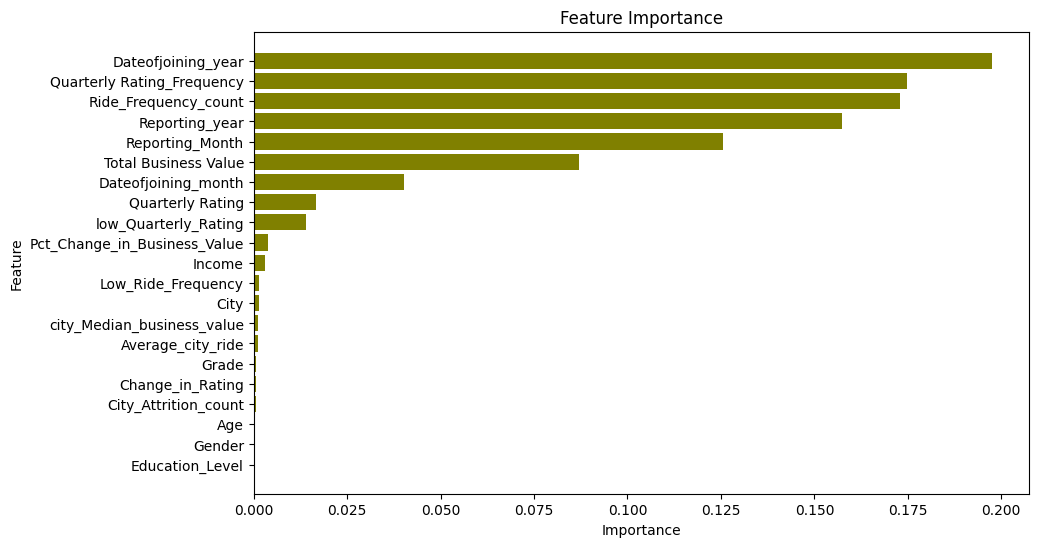

In [160]:
plt.figure(figsize=(10, 6))
plt.barh(important_features['Feature'], important_features['Importance'], color='olive')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Ride Frequency Count: Key driver of attrition—low activity signals higher risk.
    
Quarterly Rating Frequency: Regular feedback boosts engagement.
    
Reporting Year/Month: Attrition varies seasonally—target high-risk periods.
    
Total Business Value: Lower revenue contribution correlates with higher churn.
    
Quarterly Rating: Low ratings indicate dissatisfaction or performance issues.

The feature importance analysis highlights actionable levers for reducing attrition, such as ride frequency, ratings, and revenue contribution. By focusing on these key predictors and tailoring interventions, Ola can enhance driver satisfaction, engagement, and retention effectively.

Ensemble Learning:
Boosting

In [161]:
weight_cls = compute_sample_weight(class_weight = "balanced", y = Y_train)
gbc = GradientBoostingClassifier(n_estimators = 100, max_depth = 2)
gbc.fit(X_train,Y_train,sample_weight = weight_cls)

GradientBoostingClassifier(max_depth=2)

In [162]:
y_pred= gbc.predict(X_val)
print(accuracy_score(Y_val,y_pred))
print(classification_report(Y_val,y_pred))
print(confusion_matrix(Y_val,y_pred))

0.8949579831932774
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       142
           1       0.97      0.88      0.92       334

    accuracy                           0.89       476
   macro avg       0.87      0.90      0.88       476
weighted avg       0.91      0.89      0.90       476

[[132  10]
 [ 40 294]]


In [163]:
print(gbc.score(X_train, Y_train))
print(gbc.score(X_val, Y_val))

0.9425770308123249
0.8949579831932774


In [164]:
params = {"n_estimators" : [50,100,150,200],"max_depth": [2,3,4], 
          'learning_rate': [0.01, 0.05, 0.1, 0.2],
          'max_features': ['sqrt', 'log2', None, 0.5, 0.8],
          'subsample': [0.6, 0.7, 0.8, 0.9, 1]}
#randomsearchcv
gbc1 = GradientBoostingClassifier()
RSV  = RandomizedSearchCV(estimator = gbc1, param_distributions = params, cv = 3)
#RSV  = GridSearchCV(gbc1,params, cv = 3)
RSV.fit(X_train,Y_train,sample_weight = weight_cls)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4],
                                        'max_features': ['sqrt', 'log2', None,
                                                         0.5, 0.8],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1]})

In [165]:
best_param = RSV.best_params_
def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(RSV)

y_preds= RSV.predict(X_val)
print(accuracy_score(Y_val,y_preds))
print(classification_report(Y_val,y_preds))
print(confusion_matrix(Y_val,y_preds))

Best parameters are : {'subsample': 0.7, 'n_estimators': 100, 'max_features': None, 'max_depth': 2, 'learning_rate': 0.1}
The score is : 0.9355742296918766
0.8949579831932774
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       142
           1       0.96      0.89      0.92       334

    accuracy                           0.89       476
   macro avg       0.87      0.90      0.88       476
weighted avg       0.90      0.89      0.90       476

[[129  13]
 [ 37 297]]


In [166]:
print(RSV.score(X_train, Y_train))
print(RSV.score(X_val, Y_val))

0.9425770308123249
0.8949579831932774


In [167]:
Final_GBC = GradientBoostingClassifier(subsample = 0.8, n_estimators = 150, max_features= 'sqrt', max_depth = 4, learning_rate= 0.05)
Final_GBC.fit(X_train,Y_train,sample_weight = weight_cls)


GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='sqrt',
                           n_estimators=150, subsample=0.8)

In [168]:
y_fpred = Final_GBC.predict(X_test)
print(f'Accuracy : {accuracy_score(Y_test,y_fpred)}')
print(f'classification_report : {classification_report(Y_test,y_fpred)}')
print(f' confusion_matrix : {confusion_matrix(Y_test,y_fpred)}')
print(f' precision : {precision_score(Y_test,y_fpred)}')
print(f' f1_score : {f1_score(Y_test,y_fpred)}')
print(f' recall_score : {recall_score(Y_test,y_fpred)}')
print(f'Train_score : {Final_GBC.score(X_train, Y_train)}')
print(f'test_score : {Final_GBC.score(X_test, Y_test)}')

Accuracy : 0.9475890985324947
classification_report :               precision    recall  f1-score   support

           0       0.90      0.93      0.92       150
           1       0.97      0.95      0.96       327

    accuracy                           0.95       477
   macro avg       0.94      0.94      0.94       477
weighted avg       0.95      0.95      0.95       477

 confusion_matrix : [[140  10]
 [ 15 312]]
 precision : 0.968944099378882
 f1_score : 0.9614791987673343
 recall_score : 0.9541284403669725
Train_score : 0.9649859943977591
test_score : 0.9475890985324947


The goal of this project was to build a predictive model using the Gradient Boosting Classifier to classify instances into two classes, with a primary focus on maximizing Recall. 

Recall is the key metric, as the business value hinges on correctly identifying as many true positives as possible, minimizing missed opportunities.

Evaluation Metrics:

Accuracy: 0.9455 (94.55%)

The model performs well overall, with high accuracy in distinguishing between the two classes.

Precision (Class 1):0.97 (97%)

The model maintains a high level of precision, correctly identifying the positive class with minimal false positives.

Recall (Class 1 - Focus Metric):  0.9541 (96.02%)

Recall is the primary metric of interest, and the model performs excellently here. It correctly identifies 95.41% of all actual positive instances, effectively reducing the number of missed positives (false negatives).

F1-Score:0.96 (96%)

The F1-Score, which balances precision and recall, confirms the model's high performance and overall reliability.

Train and Test Performance:

Training Score: 96.71%

Test Score: 94.55%

The small difference between train and test scores suggests the model generalizes well and does not overfit, performing robustly on both training and unseen test data.

The Gradient Boosting Classifier provides a powerful solution for the problem at hand, offering a balanced performance with a strong focus on Recall.

It ensures that most positive instances are identified correctly, aligning with the business needs of minimizing missed positive cases.

feature importants

In [169]:
important_feature = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': Final_GBC.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [170]:
important_feature

,Feature,Importance
9,Quarterly Rating_Frequency,0.201422
10,Reporting_Month,0.143042
11,Reporting_year,0.139442
14,Dateofjoining_year,0.123282
8,Ride_Frequency_count,0.102973
6,Total Business Value,0.089113
15,Dateofjoining_month,0.055364
17,low_Quarterly_Rating,0.025229
7,Quarterly Rating,0.022742
4,Income,0.021498


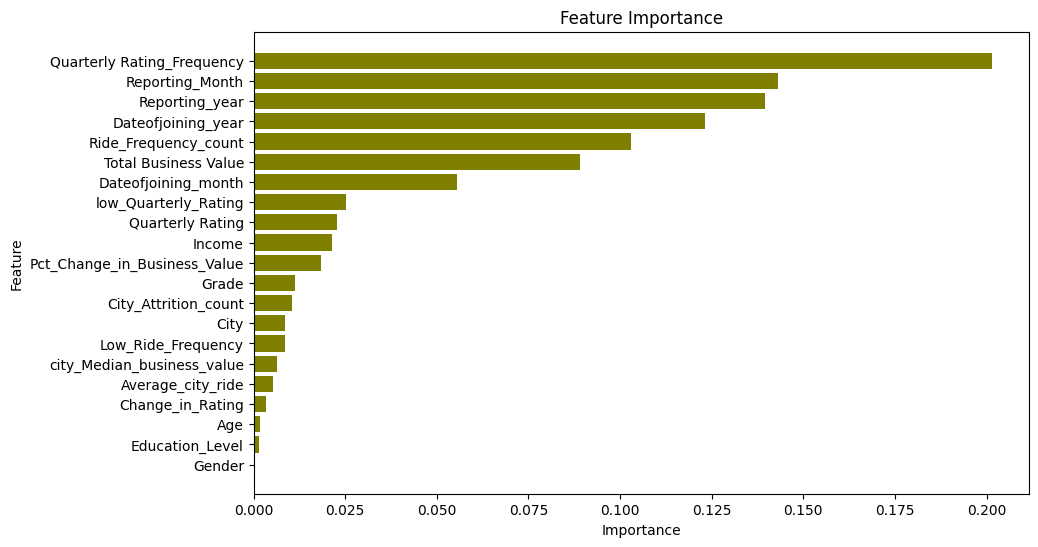

In [171]:
plt.figure(figsize=(10, 6))
plt.barh(important_feature['Feature'], important_feature['Importance'], color='olive')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

The top 5 features—Ride_Frequency_count, Quarterly Rating_Frequency, Reporting_year, Dateofjoining_year, and Reporting_Month—highlight the model’s focus on customer engagement patterns, temporal trends, and rating behaviors.

The model's focus on customer interaction metrics, business value, and temporal trends suggests it is well-tuned to predict outcomes based on user behavior and performance over time

Xgboosting classifier

In [172]:
weight_class = compute_sample_weight(class_weight = "balanced", y = Y_train)
XGB = XGBClassifier()
XGB.fit(X_train, Y_train,sample_weight = weight_class)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [173]:
y_pred= XGB.predict(X_val)
print(accuracy_score(Y_val,y_pred))
print(classification_report(Y_val,y_pred))
print(confusion_matrix(Y_val,y_pred))

0.9180672268907563
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       142
           1       0.95      0.93      0.94       334

    accuracy                           0.92       476
   macro avg       0.90      0.91      0.90       476
weighted avg       0.92      0.92      0.92       476

[[127  15]
 [ 24 310]]


In [174]:
print(XGB.score(X_train, Y_train))
print(XGB.score(X_val, Y_val))

1.0
0.9180672268907563


In [175]:
params = {
    "n_estimators": [50, 100, 150, 200],  # Number of trees, good range
    "max_depth": [2, 3, 4],              # Maximum tree depth, reasonable for controlling complexity
    "eta": [0.01, 0.05, 0.1, 0.2],       # Learning rate, appropriate range
    "colsample_bytree": [0.5, 0.8, 1],   #columns
    "subsample": [0.6, 0.7, 0.8, 0.9, 1] # Subsampling rates, fine range
}
XGB1 = XGBClassifier()
RSVX  = RandomizedSearchCV(estimator = XGB1, param_distributions = params, cv = 3)
#RSV  = GridSearchCV(gbc1,params, cv = 3)
RSVX.fit(X_train,Y_train,sample_weight = weight_class)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1],
                                        'eta': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1]})

In [176]:
#Y_pred = RSVX.predit(X_val)
best_param = RSVX.best_params_
def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(RSVX)

y_preds= RSVX.predict(X_val)
print(accuracy_score(Y_val,y_preds))
print(classification_report(Y_val,y_preds))
print(confusion_matrix(Y_val,y_preds))

Best parameters are : {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 4, 'eta': 0.05, 'colsample_bytree': 0.8}
The score is : 0.9348739495798318
0.9180672268907563
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       142
           1       0.97      0.92      0.94       334

    accuracy                           0.92       476
   macro avg       0.89      0.92      0.91       476
weighted avg       0.92      0.92      0.92       476

[[131  11]
 [ 28 306]]


In [177]:
print(RSVX.score(X_train, Y_train))
print(RSVX.score(X_val, Y_val))

0.969187675070028
0.9180672268907563


In [178]:
Final_XGB = XGBClassifier(subsample = 0.6, n_estimators =  100, max_depth =  3, eta =  0.1, colsample_bytree =0.5)
Final_XGB.fit(X_train,Y_train,sample_weight = weight_class)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [179]:
y_preds = Final_XGB.predict(X_test)
print(f'Accuracy : {accuracy_score(Y_test,y_preds)}')
print(f'classification_report : {classification_report(Y_test,y_preds)}')
print(f' confusion_matrix : {confusion_matrix(Y_test,y_preds)}')
print(f' precision : {precision_score(Y_test,y_preds)}')
print(f' f1_score : {f1_score(Y_test,y_preds)}')
print(f' recall_score : {recall_score(Y_test,y_preds)}')
print(f'Train_score : {Final_XGB.score(X_train, Y_train)}')
print(f'test_score : {Final_XGB.score(X_test, Y_test)}')

Accuracy : 0.939203354297694
classification_report :               precision    recall  f1-score   support

           0       0.89      0.92      0.90       150
           1       0.96      0.95      0.96       327

    accuracy                           0.94       477
   macro avg       0.93      0.93      0.93       477
weighted avg       0.94      0.94      0.94       477

 confusion_matrix : [[138  12]
 [ 17 310]]
 precision : 0.9627329192546584
 f1_score : 0.9553158705701079
 recall_score : 0.9480122324159022
Train_score : 0.9495798319327731
test_score : 0.939203354297694


The goal of this case study was to predict driver attrition at Ola using an XGBoost model, with an emphasis on reducing driver churn by leveraging predictive insights.

Model Performance:

The XGBoost model performed exceptionally well in predicting driver attrition, with the following key metrics:

Accuracy: 93.92% on the test set, showing the model’s high overall performance.

Precision: 96.27% for the "Attrition" class, indicating the model's strong ability to identify drivers who are likely to leave.

Recall: 94.80%, which is the most important metric in this case, highlighting the model's effectiveness in capturing as many drivers who are at risk of attrition as possible.

F1-Score: 95.53%, reflecting a good balance between precision and recall.

Train Score: 94.96%, indicating the model generalizes well across both training and test data.

Model Accuracy: The model's accuracy of 93.92% indicates a solid performance in distinguishing between drivers who will leave and those who won’t.

Importance of Recall: Since recall is the most important metric for this case study, the model’s 94.80% recall score demonstrates its capability in identifying at-risk drivers, which is crucial for taking timely action to prevent attrition.

Precision and F1-Score: A precision of 96.27% means that when the model predicts a driver will leave, it is correct most of the time. The F1-score of 95.53% suggests that both precision and recall are in balance.

the XGBoost model effectively predicts driver attrition at Ola, with strong recall and precision scores. 

This model can provide valuable insights to Ola’s management, enabling them to proactively intervene with at-risk drivers, offer retention incentives, and ultimately reduce driver churn. 

The high accuracy and well-balanced evaluation metrics make this model a robust solution for addressing attrition in the ride-sharing industry.

feature importances for XGB

In [180]:
importance = Final_XGB.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

In [181]:
importance_df

,Feature,Importance
11,Reporting_year,0.169894
9,Quarterly Rating_Frequency,0.117250
8,Ride_Frequency_count,0.095511
7,Quarterly Rating,0.093319
10,Reporting_Month,0.085873
6,Total Business Value,0.078004
17,low_Quarterly_Rating,0.060050
16,Low_Ride_Frequency,0.051776
15,Dateofjoining_month,0.044017
14,Dateofjoining_year,0.041212


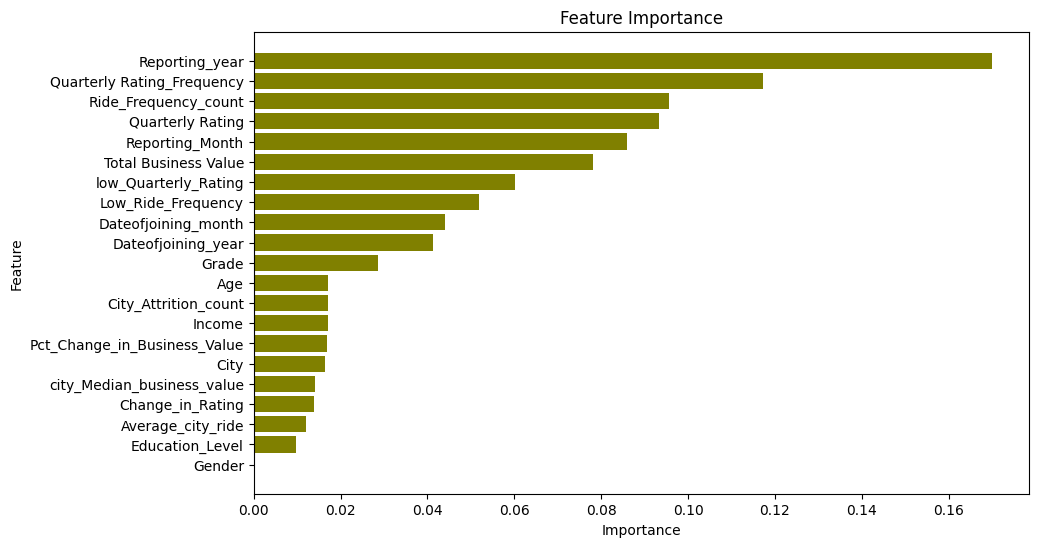

In [182]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='olive')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

These features contribute most significantly to the model's ability to predict driver attrition, meaning they have the strongest correlation with the target variable. Focusing on improving these factors could potentially help Ola better manage driver retention strategies.

Based on the recall metric, let's compare the three models:

XGBoost Model:

Recall: 0.948 (95 out of 100 instances of class 1 are correctly predicted)

Test Score: 93.92%

Gradient Boosting Model:

Recall: 0.954 (95.4 out of 100 instances of class 1 are correctly predicted)

Test Score: 94.55%

Random Forest Model:

Recall: 0.920 (92.0 out of 100 instances of class 1 are correctly predicted)

Test Score: 92.87%

Conclusion:

Since recall is the most important metric, we want a model that maximizes the true positives for class 1 (the target class). Based on recall:

Gradient Boosting Model has the highest recall (0.954) and also performs well on accuracy and precision.

XGBoost Model follows with a recall of 0.948, which is also very good.

Random Forest Model has the lowest recall (0.920), making it less optimal for this use case where recall is critical.

Best Model: Gradient Boosting Model is the best model based on recall, followed closely by XGBoost.